
## Bond Fluctuation Monte Carlo

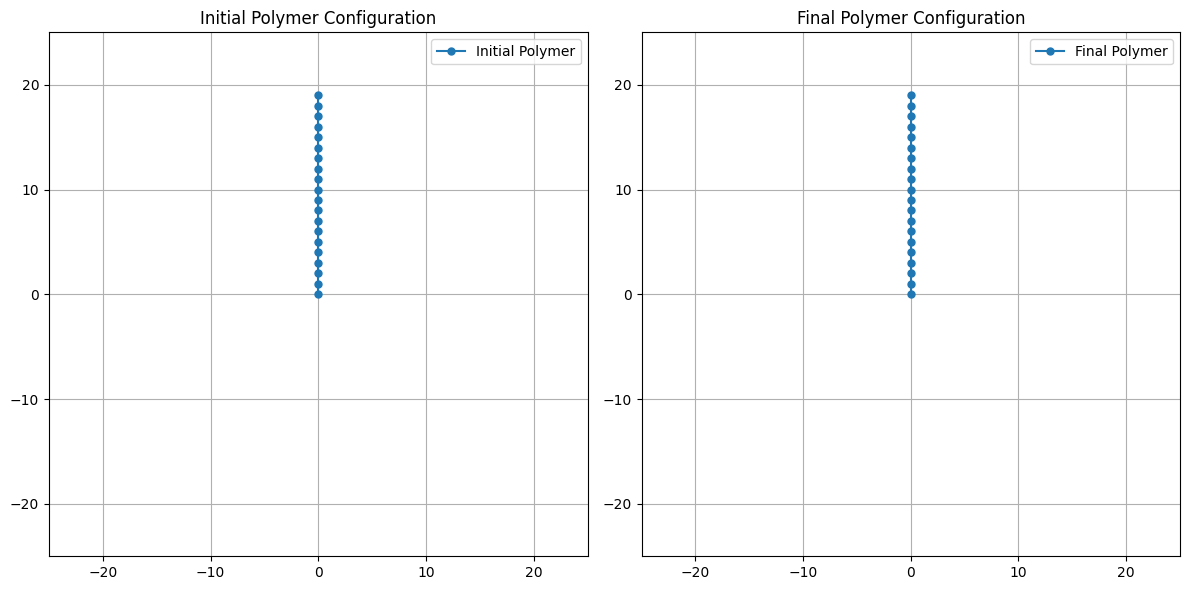

Radius of Gyration (Final Configuration): 5.77


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 20  # Number of monomers in the polymer
L = 50  # Size of the lattice (half-width of the grid in each direction)
T = 300  # Temperature in Kelvin
k_B = 1.380649 * 10**-23  # Boltzmann constant (J/K)
epsilon = 0.1  # Interaction energy scale
max_attempts = 10000  # Maximum Monte Carlo attempts

# Initialize the polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Calculate the energy of the polymer
def calculate_energy(polymer):
    """Calculate the energy of the polymer configuration."""
    energy = 0.0
    # Bond stretching energy (harmonic potential)
    for i in range(1, len(polymer)):
        x1, y1 = polymer[i - 1]
        x2, y2 = polymer[i]
        bond_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        energy += (bond_length - 1)**2  # Equilibrium bond length = 1
    
    # Non-bonded interactions (repulsive potential for excluded volume)
    for i in range(len(polymer)):
        for j in range(i + 1, len(polymer)):
            x1, y1 = polymer[i]
            x2, y2 = polymer[j]
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if distance < 1.0:  # Excluded volume constraint
                energy += epsilon / distance  # Repulsive interaction
    
    return energy

# Bond Fluctuation Monte Carlo Method
def bfmc_algorithm(N, L, T, max_attempts):
    """
    Perform Bond Fluctuation Monte Carlo (BFMC) simulation.
    """
    polymer = initialize_polymer(N)  # Start with a straight-line polymer
    all_steps = [list(polymer)]  # Store all polymer configurations
    energies = [calculate_energy(polymer)]  # Store energy values
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Allowed lattice moves
    current_energy = energies[0]  # Initial energy
    
    attempts = 0
    while attempts < max_attempts:
        # Step 1: Randomly choose a monomer (excluding the first and last)
        monomer_index = np.random.randint(1, N - 1)
        x, y = polymer[monomer_index]

        # Step 2: Randomly choose a plaquette (direction) for the move
        dx, dy = directions[np.random.choice(len(directions))]
        new_monomer = (x + dx, y + dy)

        # Step 3: Check bond length and excluded volume constraints
        valid_move = True
        prev_x, prev_y = polymer[monomer_index - 1]
        next_x, next_y = polymer[monomer_index + 1]

        bond_length_prev = np.sqrt((new_monomer[0] - prev_x)**2 + (new_monomer[1] - prev_y)**2)
        bond_length_next = np.sqrt((new_monomer[0] - next_x)**2 + (new_monomer[1] - next_y)**2)

        if not (0.5 <= bond_length_prev <= 1.5 and 0.5 <= bond_length_next <= 1.5):
            valid_move = False  # Violates bond length restriction
        
        if new_monomer in polymer:
            valid_move = False  # Violates excluded volume constraint

        if not valid_move:
            attempts += 1
            continue

        # Step 4: Calculate energy change ΔE
        temp_polymer = polymer.copy()
        temp_polymer[monomer_index] = new_monomer
        new_energy = calculate_energy(temp_polymer)
        delta_E = new_energy - current_energy

        # Step 5: Accept or reject the move based on Boltzmann factor
        r = np.random.rand()
        if r < np.exp(-delta_E / (k_B * T)):
            polymer = temp_polymer  # Accept the move
            current_energy = new_energy
            energies.append(current_energy)  # Record energy
            all_steps.append(list(polymer))  # Record configuration
        
        attempts += 1

    return all_steps, energies

# Run the simulation
steps, energies = bfmc_algorithm(N, L, T, max_attempts)

# Plot the initial and final polymer configurations
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Initial configuration
x_init, y_init = zip(*steps[0])
axs[0].plot(x_init, y_init, '-o', markersize=5, label="Initial Polymer")
axs[0].set_xlim(-L/2, L/2)
axs[0].set_ylim(-L/2, L/2)
axs[0].set_title("Initial Polymer Configuration")
axs[0].legend()
axs[0].grid(True)

# Final configuration
x_final, y_final = zip(*steps[-1])
axs[1].plot(x_final, y_final, '-o', markersize=5, label="Final Polymer")
axs[1].set_xlim(-L/2, L/2)
axs[1].set_ylim(-L/2, L/2)
axs[1].set_title("Final Polymer Configuration")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Additional Analysis: Radius of Gyration
def calculate_radius_of_gyration(polymer):
    """Calculate the radius of gyration of the polymer."""
    positions = np.array(polymer)
    center_of_mass = np.mean(positions, axis=0)
    squared_distances = np.sum((positions - center_of_mass)**2, axis=1)
    return np.sqrt(np.mean(squared_distances))

Rg = calculate_radius_of_gyration(steps[-1])
print(f"Radius of Gyration (Final Configuration): {Rg:.2f}")



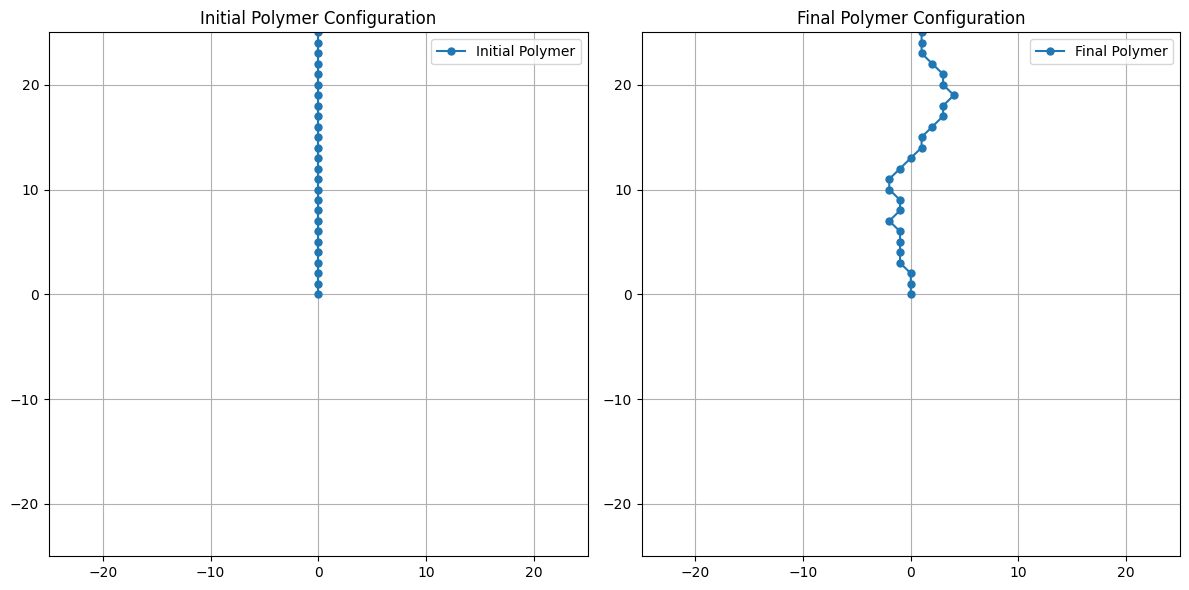

Radius of Gyration (Final Configuration): 28.90


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of monomers in the polymer
L = 50  # Size of the lattice (half-width of the grid in each direction)
T = 300  # Temperature in Kelvin
k_B = 1  # Boltzmann constant (J/K)
epsilon = 0.1  # Interaction energy scale
max_attempts = 10000  # Maximum Monte Carlo attempts

# Initialize the polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Calculate the energy of the polymer
def calculate_energy(polymer):
    """Calculate the energy of the polymer configuration."""
    energy = 0.0
    # Bond stretching energy (harmonic potential)
    for i in range(1, len(polymer)):
        x1, y1 = polymer[i - 1]
        x2, y2 = polymer[i]
        bond_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        energy += (bond_length - 1)**2  # Equilibrium bond length = 1
    
    # Non-bonded interactions (repulsive potential for excluded volume)
    for i in range(len(polymer)):
        for j in range(i + 1, len(polymer)):
            x1, y1 = polymer[i]
            x2, y2 = polymer[j]
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if distance < 1.0:  # Excluded volume constraint
                energy += epsilon / distance  # Repulsive interaction
    
    return energy

# Bond Fluctuation Monte Carlo Method
def bfmc_algorithm(N, L, T, max_attempts):
    """
    Perform Bond Fluctuation Monte Carlo (BFMC) simulation.
    """
    polymer = initialize_polymer(N)  # Start with a straight-line polymer
    all_steps = [list(polymer)]  # Store all polymer configurations
    energies = [calculate_energy(polymer)]  # Store energy values
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Allowed lattice moves
    current_energy = energies[0]  # Initial energy
    
    attempts = 0
    while attempts < max_attempts:
        # Step 1: Randomly choose a monomer (excluding the first and last)
        monomer_index = np.random.randint(1, N - 1)
        x, y = polymer[monomer_index]

        # Step 2: Randomly choose a plaquette (direction) for the move
        dx, dy = directions[np.random.choice(len(directions))]
        new_monomer = (x + dx, y + dy)

        # Step 3: Check bond length and excluded volume constraints
        valid_move = True
        prev_x, prev_y = polymer[monomer_index - 1]
        next_x, next_y = polymer[monomer_index + 1]

        bond_length_prev = np.sqrt((new_monomer[0] - prev_x)**2 + (new_monomer[1] - prev_y)**2)
        bond_length_next = np.sqrt((new_monomer[0] - next_x)**2 + (new_monomer[1] - next_y)**2)

        if not (0.5 <= bond_length_prev <= 1.5 and 0.5 <= bond_length_next <= 1.5):
            valid_move = False  # Violates bond length restriction
        
        if new_monomer in polymer:
            valid_move = False  # Violates excluded volume constraint

        if not valid_move:
            attempts += 1
            continue

        # Step 4: Calculate energy change ΔE
        temp_polymer = polymer.copy()
        temp_polymer[monomer_index] = new_monomer
        new_energy = calculate_energy(temp_polymer)
        delta_E = new_energy - current_energy

        # Step 5: Accept or reject the move based on Boltzmann factor
        r = np.random.rand()
        if r < np.exp(-delta_E / (k_B * T)):
            polymer = temp_polymer  # Accept the move
            current_energy = new_energy
            energies.append(current_energy)  # Record energy
            all_steps.append(list(polymer))  # Record configuration
        
        attempts += 1

    return all_steps, energies

# Run the simulation
steps, energies = bfmc_algorithm(N, L, T, max_attempts)

# Plot the initial and final polymer configurations
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Initial configuration
x_init, y_init = zip(*steps[0])
axs[0].plot(x_init, y_init, '-o', markersize=5, label="Initial Polymer")
axs[0].set_xlim(-L/2, L/2)
axs[0].set_ylim(-L/2, L/2)
axs[0].set_title("Initial Polymer Configuration")
axs[0].legend()
axs[0].grid(True)

# Final configuration
x_final, y_final = zip(*steps[-1])
axs[1].plot(x_final, y_final, '-o', markersize=5, label="Final Polymer")
axs[1].set_xlim(-L/2, L/2)
axs[1].set_ylim(-L/2, L/2)
axs[1].set_title("Final Polymer Configuration")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Additional Analysis: Radius of Gyration
def calculate_radius_of_gyration(polymer):
    """Calculate the radius of gyration of the polymer."""
    positions = np.array(polymer)
    center_of_mass = np.mean(positions, axis=0)
    squared_distances = np.sum((positions - center_of_mass)**2, axis=1)
    return np.sqrt(np.mean(squared_distances))

Rg = calculate_radius_of_gyration(steps[-1])
print(f"Radius of Gyration (Final Configuration): {Rg:.2f}")



In [ ]:
for step_idx, step in enumerate(steps):
    plt.figure(figsize=(6, 6))
    plt.xlim(-L/5, L/5)
    plt.ylim(-L/5, L/3)
    plt.grid(True)
    plt.title(f"Polymer Configuration - Step {step_idx + 1}")
    
    x, y = zip(*step)  # Extract x and y coordinates
    plt.plot(x, y, '#57AFFD', lw=2, label="Polymer Chain")  # Plot polymer
    plt.plot(x[0], y[0], 'go', markersize=5, label="Start Monomer")  # Start monomer
    plt.plot(x[-1], y[-1], 'ro', markersize=5, label="End Monomer")  # End monomer
    
    plt.legend()
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()


# Perm Algorithm

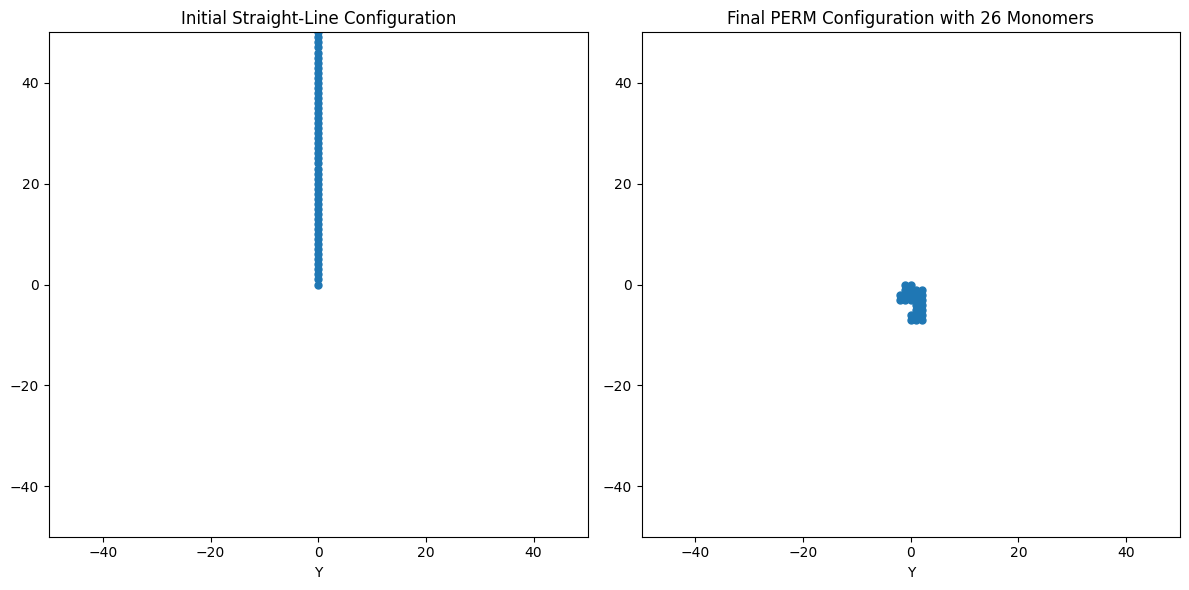

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paremeters
N = 100  # Number of monomers in the polymer
L = 50   # Size of the lattice
max_attempts = 1000  # Maximum attempts to grow the chain

# Generate the initial straight-line polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Generate polymer chain using simplified PERM
def perm_algorithm(N, L):
    """
    Generate a polymer chain using a simplified PERM-like algorithm.
    """
    polymer = [(0, 0)]  # Start at the origin
    weights = [1.0]     # Initial weight
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 2D movement directions
    
    for _ in range(1, N):
        # Get the current position of the chain end
        x, y = polymer[-1]
        candidates = []
        
        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)
        
        # Check if we can proceed
        if not candidates:
            # If no valid moves, terminate early
            break
        
        # Assign weights to the candidates
        weights = [1.0 for _ in candidates]  # Uniform weight for simplicity
        
        # Normalize weights
        probabilities = np.array(weights) / sum(weights)
        
        # Select the next position based on weights
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
    
    return polymer

# Generate configurations
initial_polymer = initialize_polymer(N)
final_polymer = perm_algorithm(N, L)

# Plot the initial and final configurations side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Initial configuration
x_init, y_init = zip(*initial_polymer)
axs[0].plot(x_init, y_init, '-o', markersize=5)
axs[0].set_xlim(-L, L)
axs[0].set_ylim(-L, L)
axs[0].set_title("Initial Straight-Line Configuration")

# Final configuration
x_final, y_final = zip(*final_polymer)
axs[1].plot(x_final, y_final, '-o', markersize=5)
axs[1].set_xlim(-L, L)
axs[1].set_ylim(-L, L)
axs[1].set_title(f"Final PERM Configuration with {len(final_polymer)} Monomers")
axs[0].set_xlabel("X")
axs[0].set_xlabel("Y")
axs[1].set_xlabel("X")
axs[1].set_xlabel("Y")


plt.tight_layout()
plt.show()


In [5]:
#########.


In [6]:
###>


Latice size 12
Number of monomers 60


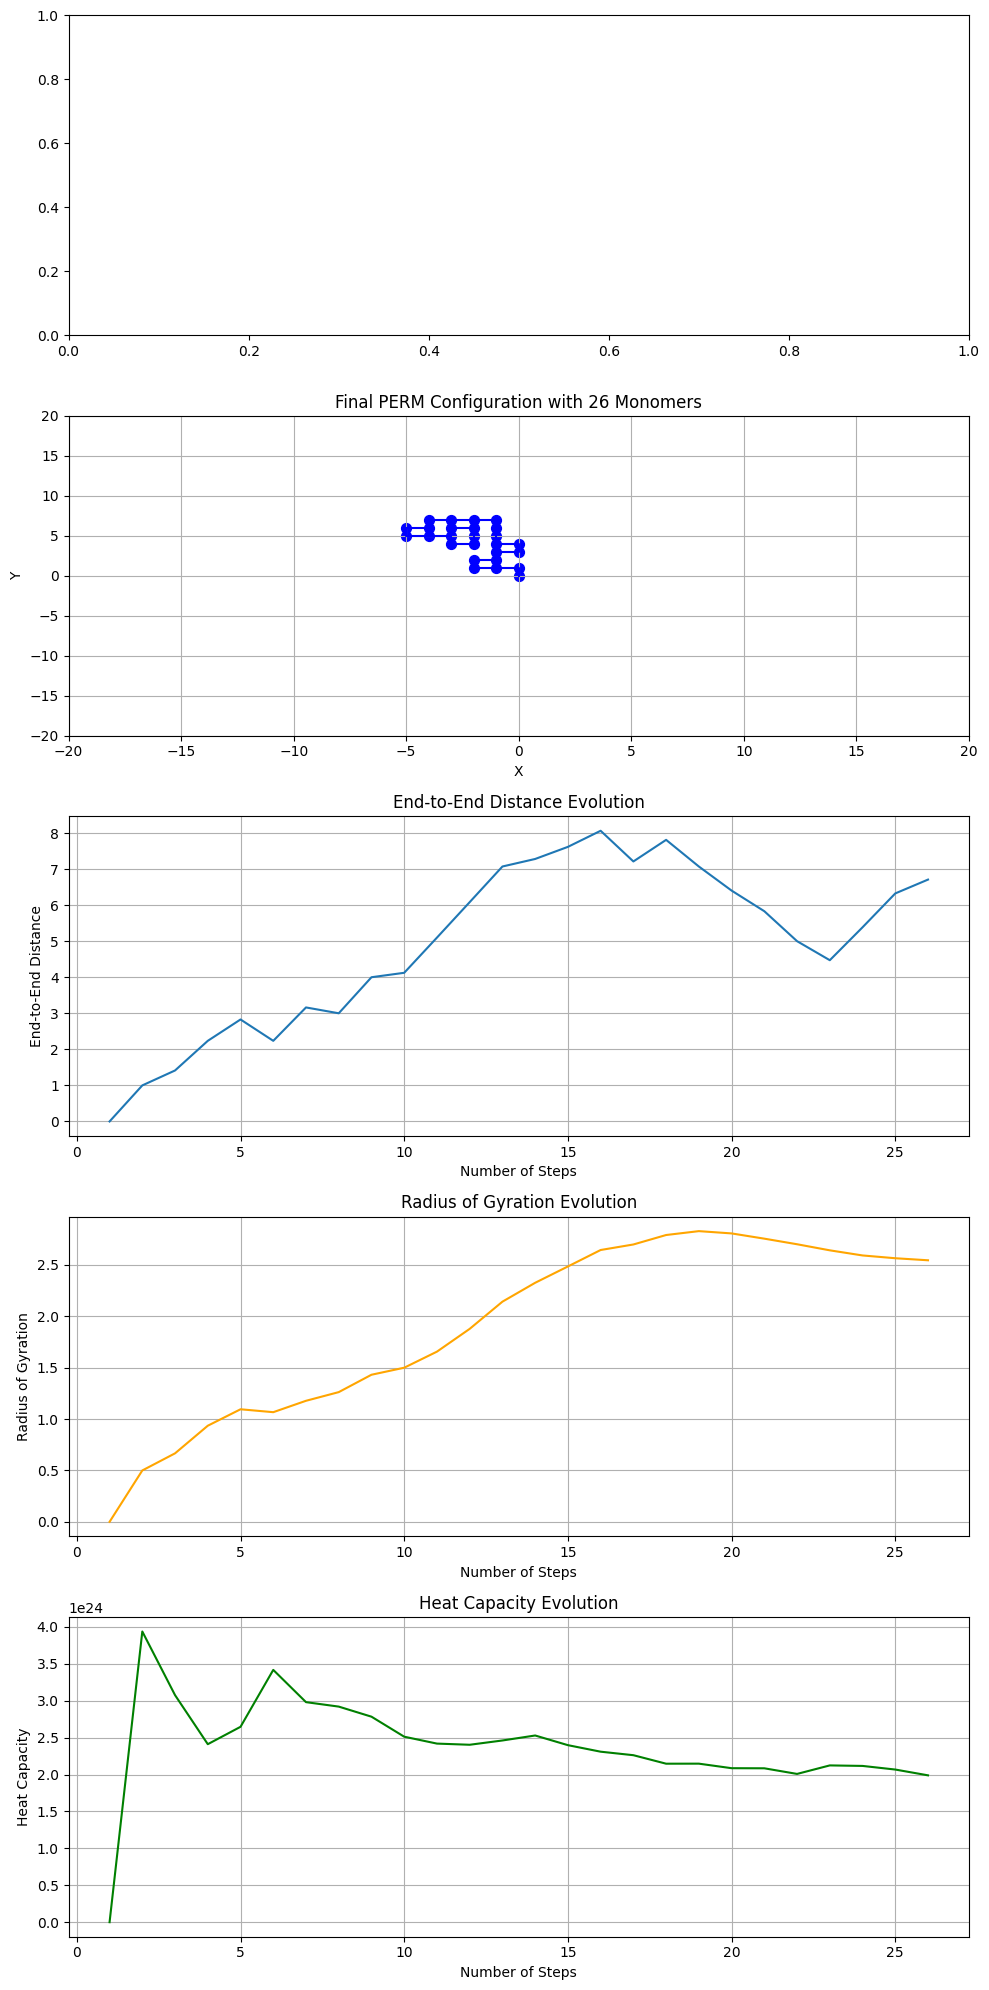

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 60  # Number of monomers in the polymer
L = 12   # Size of the lattice

k_B = 1.380649*(10**-23) #1  # Boltzmann constant (can be set to 1 for simplicity)
print("Latice size", L)
print("Number of monomers", N)

# Generate the initial straight-line polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Generate polymer chain using simplified PERM
def perm_algorithm(N, L):
    """
    Generate a polymer chain using a simplified PERM-like algorithm.
    """
    polymer = [(0, 0)]  # Start at the origin
    all_steps = [list(polymer)]  # Store the initial polymer configuration
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 2D movement directions
    
    for _ in range(1, N):
        # Get the current position of the chain end
        x, y = polymer[-1]
        candidates = []
        
        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)
        
        # Check if we can proceed
        if not candidates:
            # If no valid moves, terminate early
            break
        
        # Assign uniform weights to the candidates
        weights = [1.0 for _ in candidates]  # Uniform weight for simplicity
        
        # Normalize weights
        probabilities = np.array(weights) / sum(weights)
        
        # Select the next position based on weights
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
        
        # Record the current polymer configuration
        all_steps.append(list(polymer))
    
    return all_steps

# Generate configurations
initial_polymer = initialize_polymer(N)
steps = perm_algorithm(N, L)

# Simulating energy values (for demonstration purposes)
energy_function = lambda polymer: np.random.uniform(-10, 10)  # Random energy for example
energies = [energy_function(step) for step in steps]

# Calculate heat capacity for each step
T = 1.0  # Example temperature
def calculate_heat_capacity(energies, T):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.array(energies) ** 2)
    return (mean_E2 - mean_E**2) / (k_B * T**2)

heat_capacity_values = [calculate_heat_capacity(energies[:i+1], T) for i in range(len(energies))]

# Plot the results
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plot Initial Configuration
#x_init, y_init = zip(*initial_polymer)
#axs[0].scatter(x_init, y_init, c='blue', s=50)
#axs[0].plot(x_init, y_init, c='blue')
#axs[0].set_xlim(-L, L)
#axs[0].set_ylim(-L, L)
#axs[0].set_title("Initial Straight-Line Configuration")
#axs[0].set_xlabel("X")
#axs[0].set_ylabel("Y")
#axs[0].grid(True)

# Plot Final Configuration
final_polymer = steps[-1]
x_final, y_final = zip(*final_polymer)
axs[1].scatter(x_final, y_final, c='blue', s=50)
axs[1].plot(x_final, y_final, c='blue')
p = 20
axs[1].set_xlim(-p, p)
axs[1].set_ylim(-p, p)
axs[1].set_title(f"Final PERM Configuration with {len(final_polymer)} Monomers")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].grid(True)

# Plot End-to-End Distance
axs[2].plot(range(1, len(steps) + 1), [np.linalg.norm(np.array(steps[i][-1]) - np.array(steps[i][0])) for i in range(len(steps))], label="End-to-End Distance")
axs[2].set_xlabel("Number of Steps")
axs[2].set_ylabel("End-to-End Distance")
axs[2].set_title("End-to-End Distance Evolution")
axs[2].grid(True)

# Plot Radius of Gyration
radius_of_gyration = [
    np.sqrt(np.mean([(x - np.mean([p[0] for p in step]))**2 + (y - np.mean([p[1] for p in step]))**2 for x, y in step]))
    for step in steps
]
axs[3].plot(range(1, len(radius_of_gyration) + 1), radius_of_gyration, label="Radius of Gyration", color='orange')
axs[3].set_xlabel("Number of Steps")
axs[3].set_ylabel("Radius of Gyration")
axs[3].set_title("Radius of Gyration Evolution")
axs[3].grid(True)

# Plot Heat Capacity
axs[4].plot(range(1, len(heat_capacity_values) + 1), heat_capacity_values, label="Heat Capacity", color='green')
axs[4].set_xlabel("Number of Steps")
axs[4].set_ylabel("Heat Capacity")
axs[4].set_title("Heat Capacity Evolution")
axs[4].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Latice size 20
Number of monomers 60


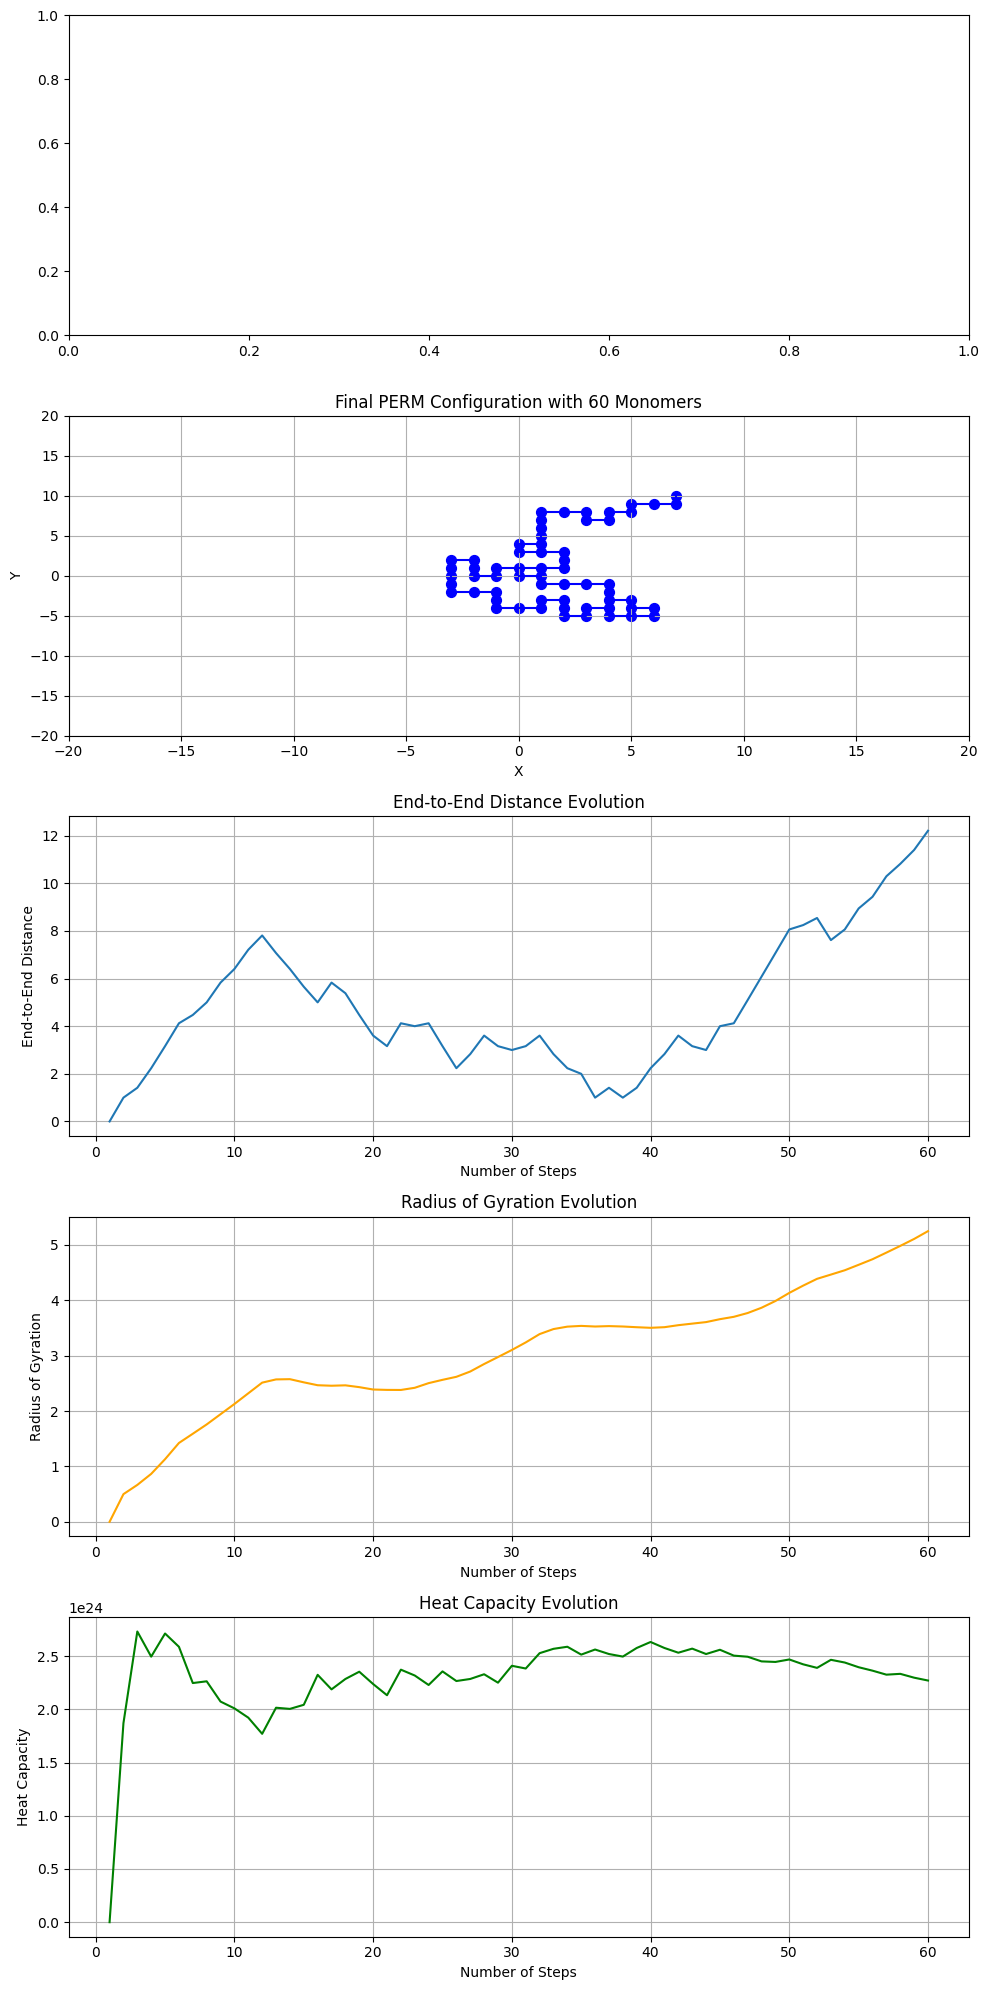

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 60  # Number of monomers in the polymer.
L = 20   # Size of the lattice

k_B = 1.380649*(10**-23) #1  # Boltzmann constant. (can be set to 1 for simplicity)
print("Latice size", L)
print("Number of monomers", N)

# Generate the initial straight-line polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Generate polymer chain using simplified PERM
def perm_algorithm(N, L):
    """
    Generate a polymer chain using a simplified PERM-like algorithm.
    """
    polymer = [(0, 0)]  # Start at the origin
    all_steps = [list(polymer)]  # Store the initial polymer configuration
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 2D movement directions
    
    for _ in range(1, N):
        # Get the current position of the chain end
        x, y = polymer[-1]
        candidates = []
        
        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)
        
        # Check if we can proceed
        if not candidates:
            # If no valid moves, terminate early
            break
        
        # Assign uniform weights to the candidates
        weights = [1.0 for _ in candidates]  # Uniform weight for simplicity
        
        # Normalize weights
        probabilities = np.array(weights) / sum(weights)
        
        # Select the next position based on weights
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
        
        # Record the current polymer configuration
        all_steps.append(list(polymer))
    
    return all_steps

# Generate configurations
initial_polymer = initialize_polymer(N)
steps = perm_algorithm(N, L)

# Simulating energy values (for demonstration purposes)
energy_function = lambda polymer: np.random.uniform(-10, 10)  # Random energy for example
energies = [energy_function(step) for step in steps]

# Calculate heat capacity for each step
T = 1.0  # Example temperature. 

def calculate_heat_capacity(energies, T):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.array(energies) ** 2)
    return (mean_E2 - mean_E**2) / (k_B * T**2)

heat_capacity_values = [calculate_heat_capacity(energies[:i+1], T) for i in range(len(energies))]

# Plot the results
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plot Initial Configuration
#x_init, y_init = zip(*initial_polymer)
#axs[0].scatter(x_init, y_init, c='blue', s=50)
#axs[0].plot(x_init, y_init, c='blue')
#axs[0].set_xlim(-L, L)
#axs[0].set_ylim(-L, L)
#axs[0].set_title("Initial Straight-Line Configuration")
#axs[0].set_xlabel("X")
#axs[0].set_ylabel("Y")
#axs[0].grid(True)

# Plot Final Configuration
final_polymer = steps[-1]
x_final, y_final = zip(*final_polymer)
axs[1].scatter(x_final, y_final, c='blue', s=50)
axs[1].plot(x_final, y_final, c='blue')
p = 20
axs[1].set_xlim(-p, p)
axs[1].set_ylim(-p, p)
axs[1].set_title(f"Final PERM Configuration with {len(final_polymer)} Monomers")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].grid(True)

# Plot End-to-End Distance
axs[2].plot(range(1, len(steps) + 1), [np.linalg.norm(np.array(steps[i][-1]) - np.array(steps[i][0])) for i in range(len(steps))], label="End-to-End Distance")
axs[2].set_xlabel("Number of Steps")
axs[2].set_ylabel("End-to-End Distance")
axs[2].set_title("End-to-End Distance Evolution")
axs[2].grid(True)

# Plot Radius of Gyration
radius_of_gyration = [
    np.sqrt(np.mean([(x - np.mean([p[0] for p in step]))**2 + (y - np.mean([p[1] for p in step]))**2 for x, y in step]))
    for step in steps
]
axs[3].plot(range(1, len(radius_of_gyration) + 1), radius_of_gyration, label="Radius of Gyration", color='orange')
axs[3].set_xlabel("Number of Steps")
axs[3].set_ylabel("Radius of Gyration")
axs[3].set_title("Radius of Gyration Evolution")
axs[3].grid(True)

# Plot Heat Capacity
axs[4].plot(range(1, len(heat_capacity_values) + 1), heat_capacity_values, label="Heat Capacity", color='green')
axs[4].set_xlabel("Number of Steps")
axs[4].set_ylabel("Heat Capacity")
axs[4].set_title("Heat Capacity Evolution")
axs[4].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


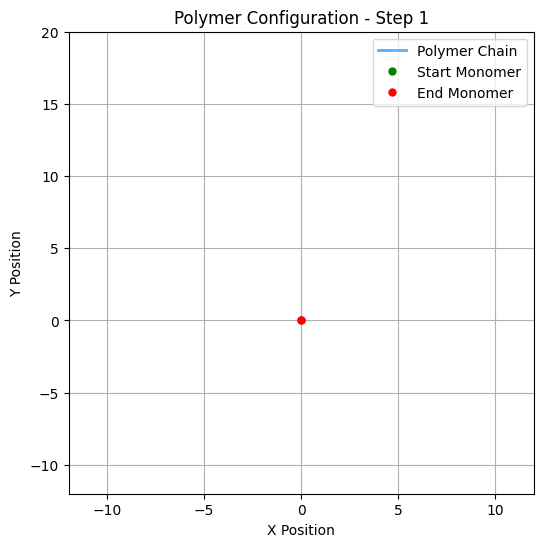

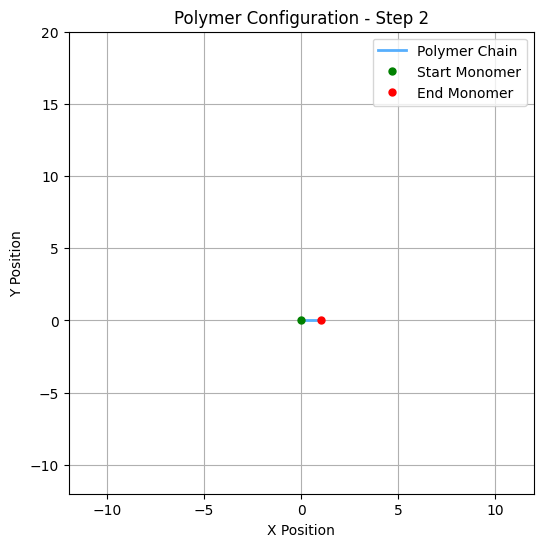

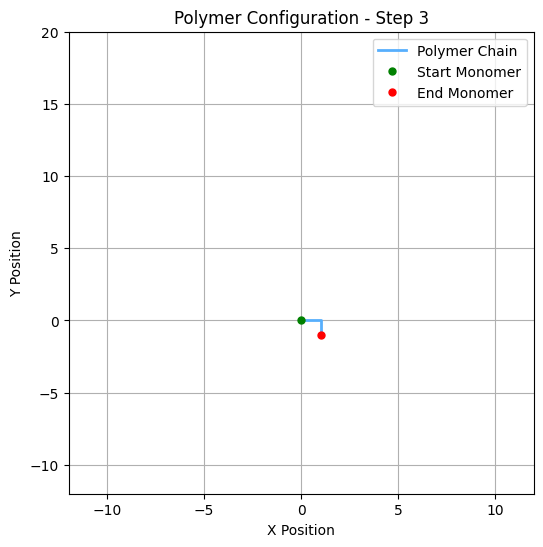

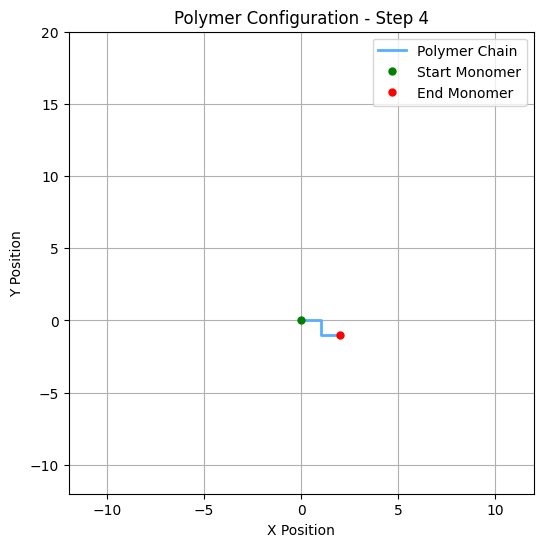

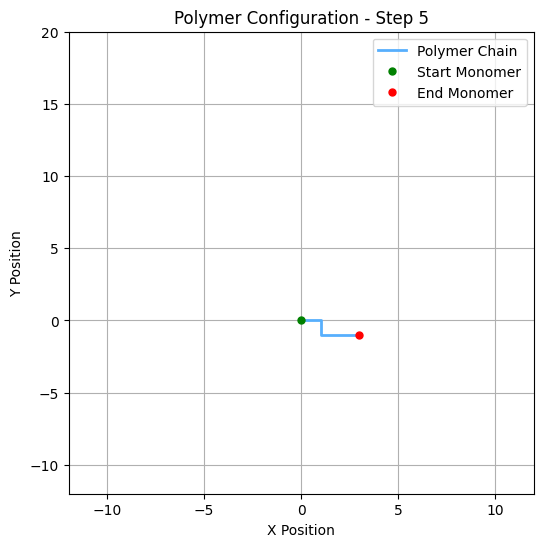

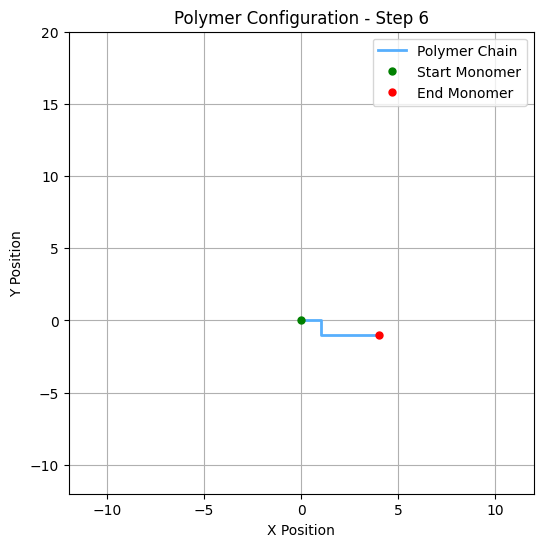

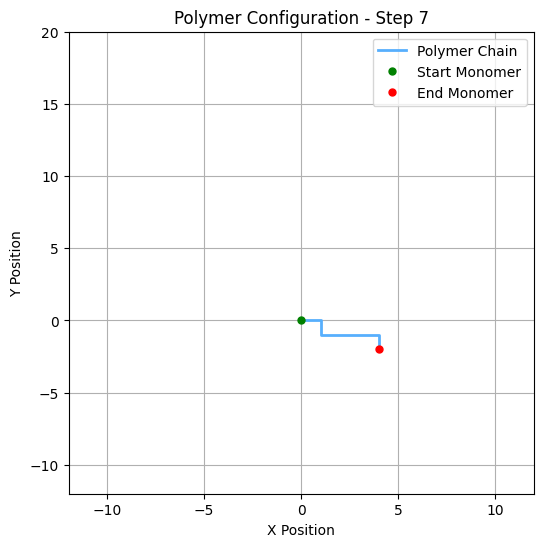

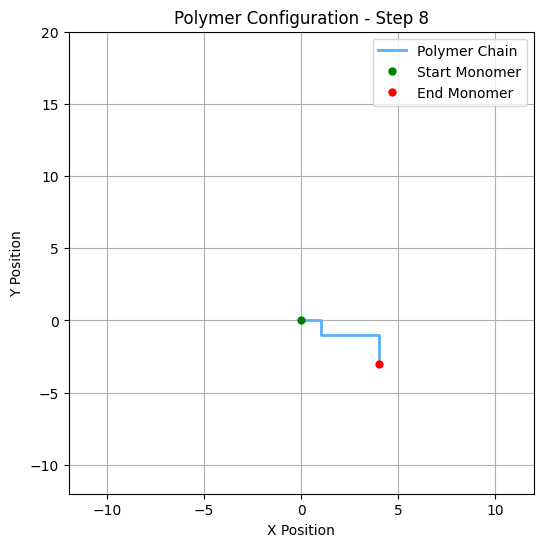

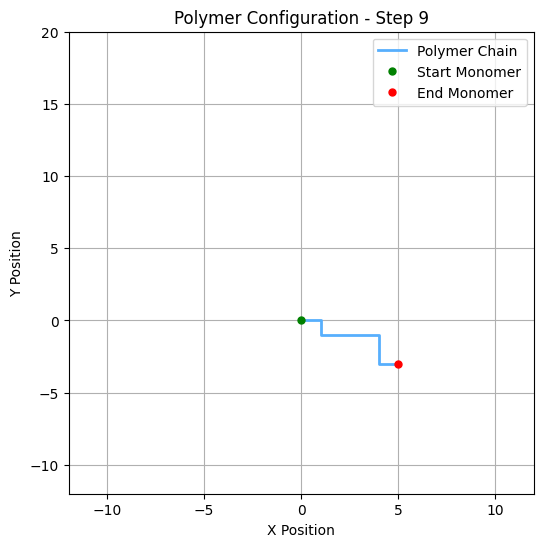

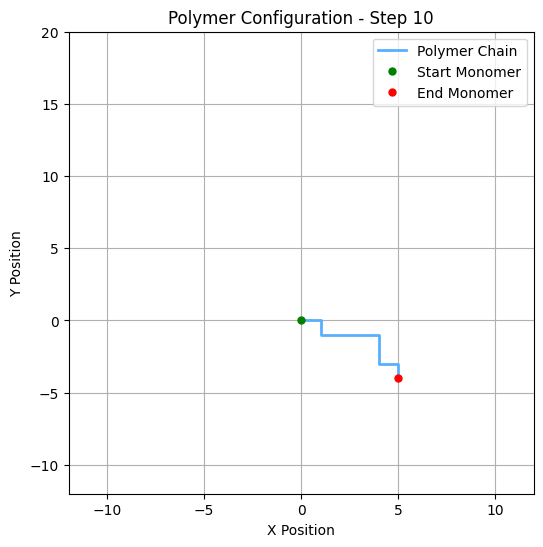

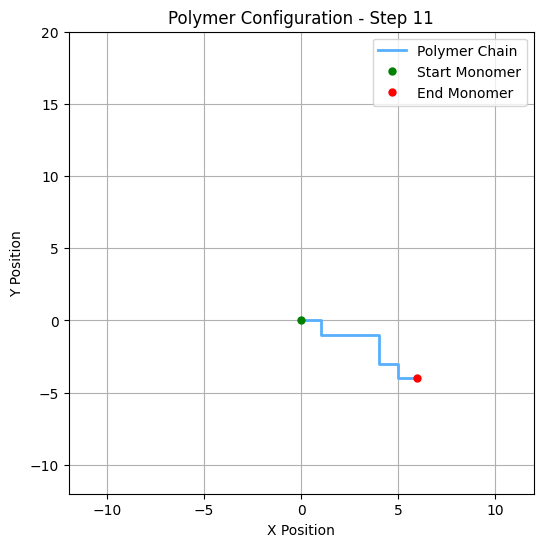

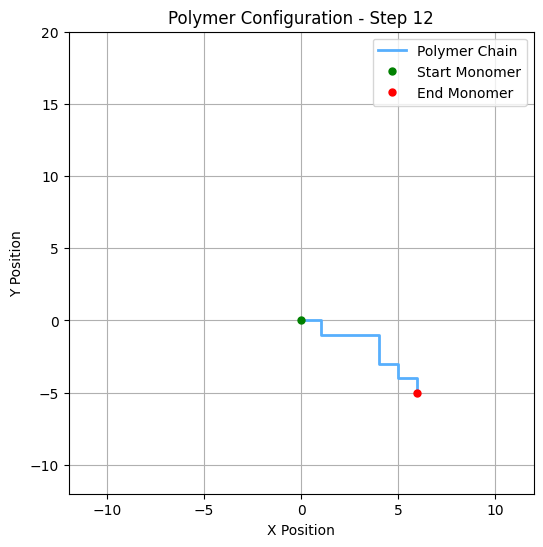

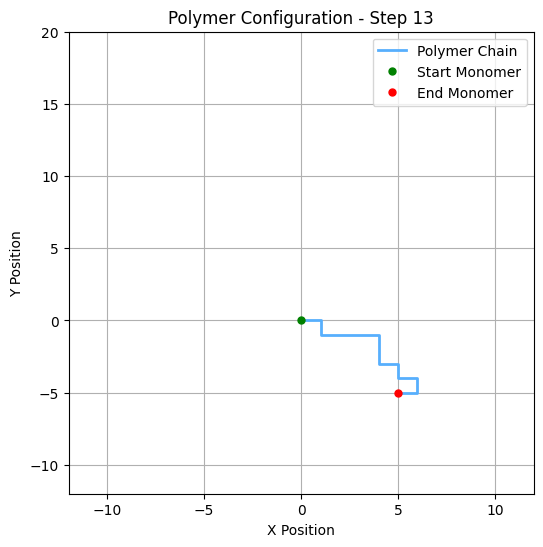

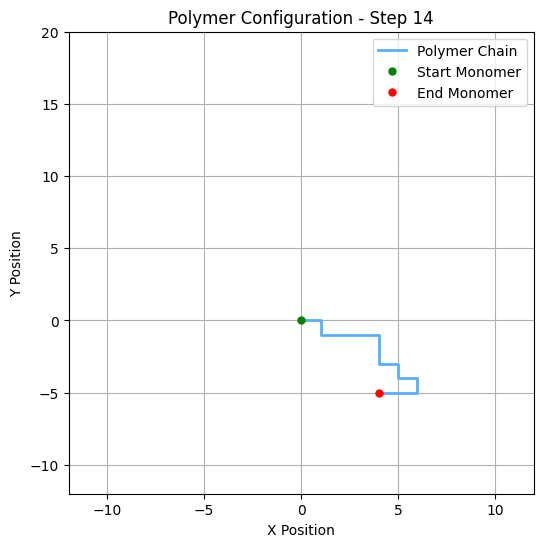

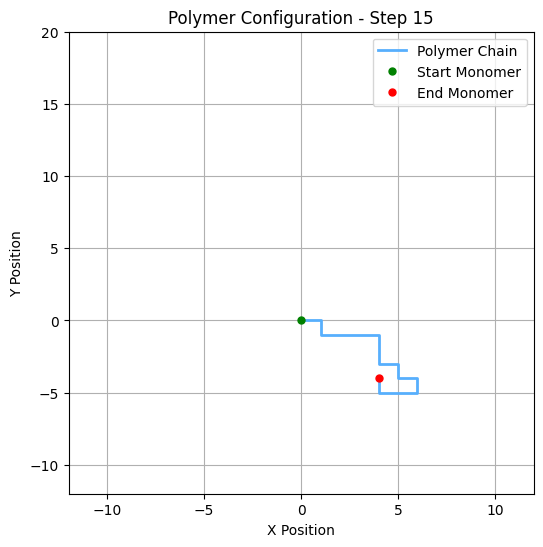

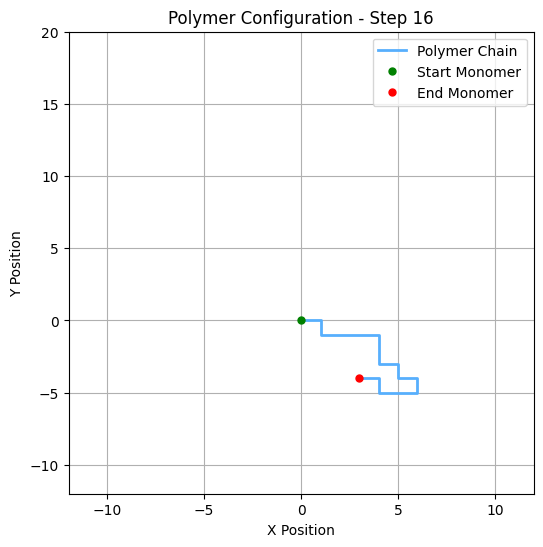

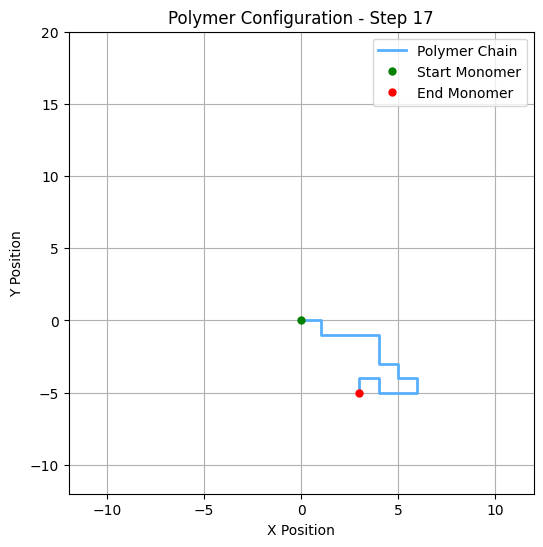

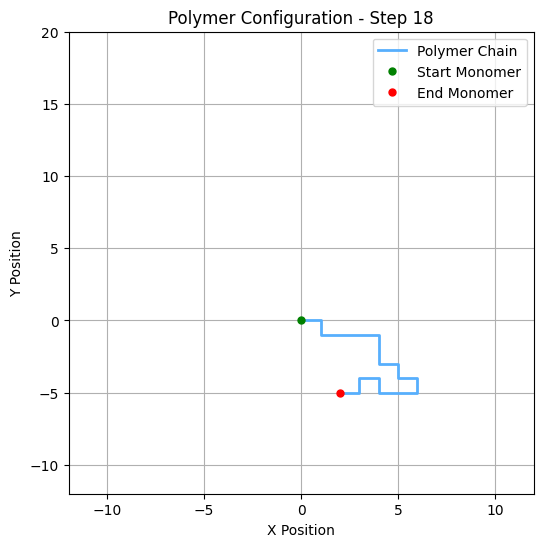

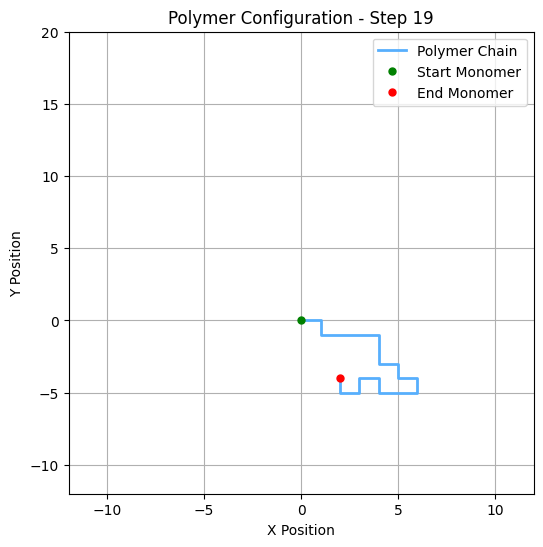

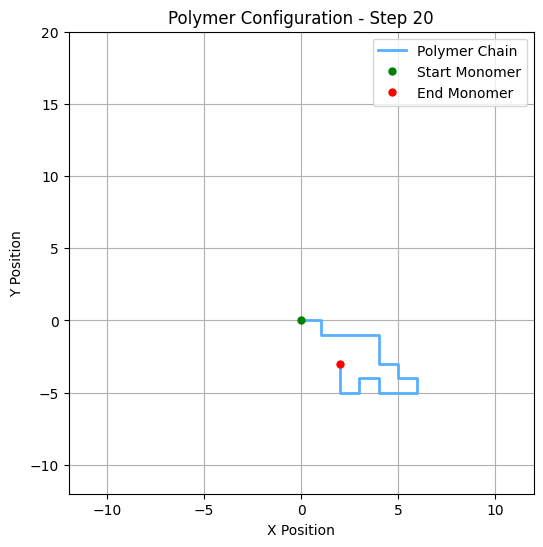

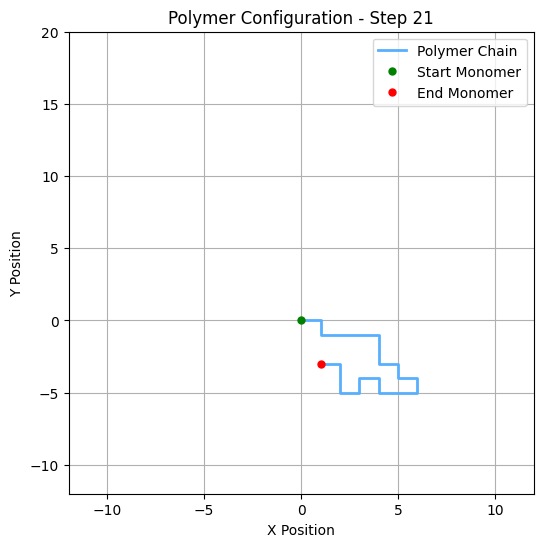

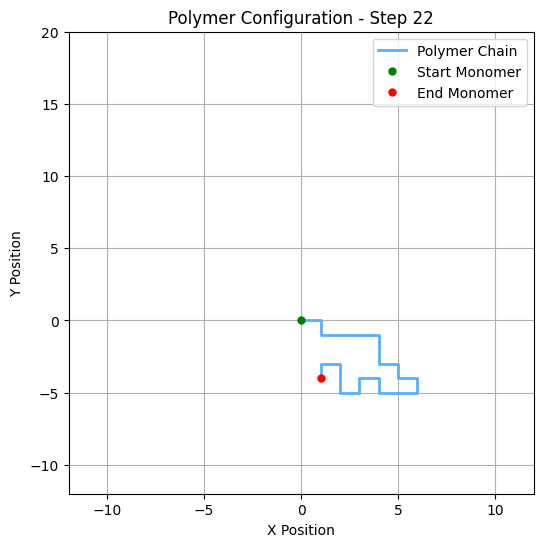

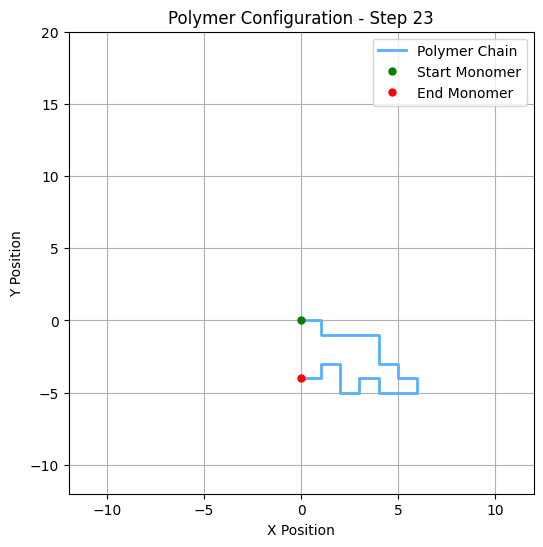

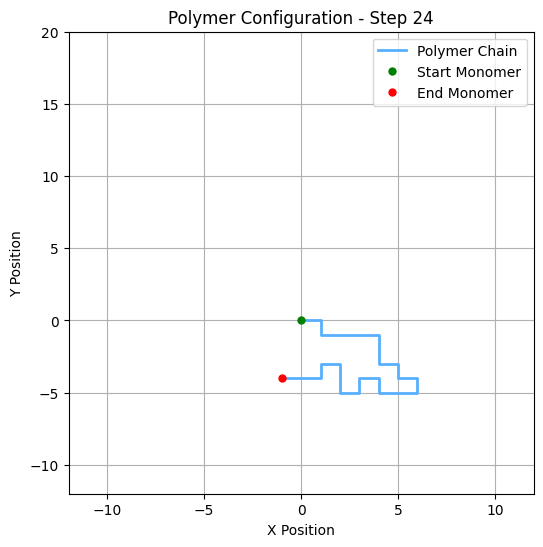

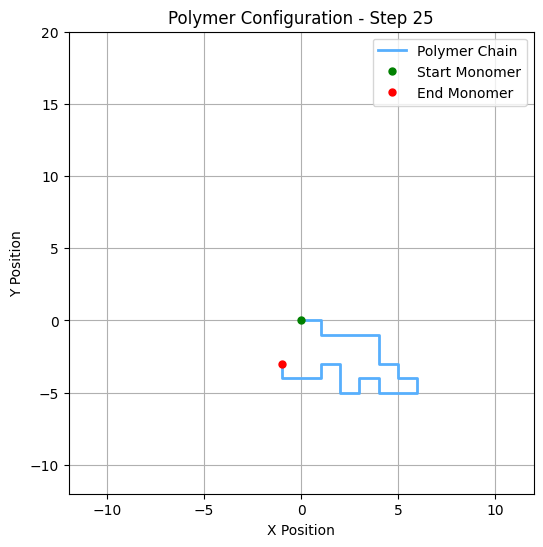

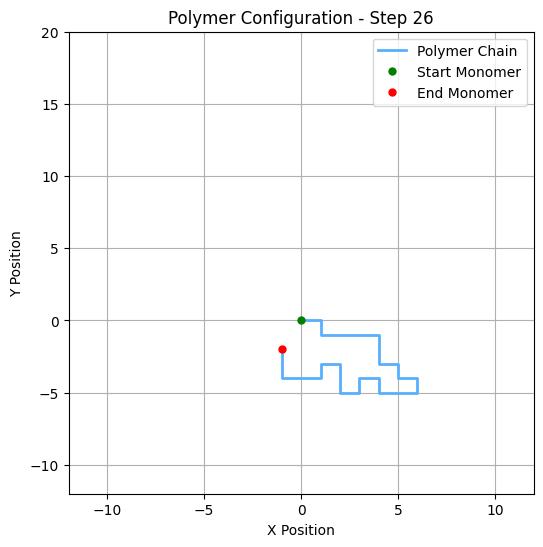

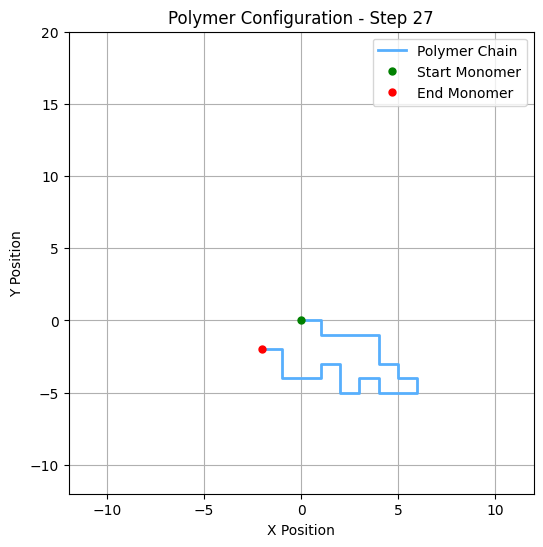

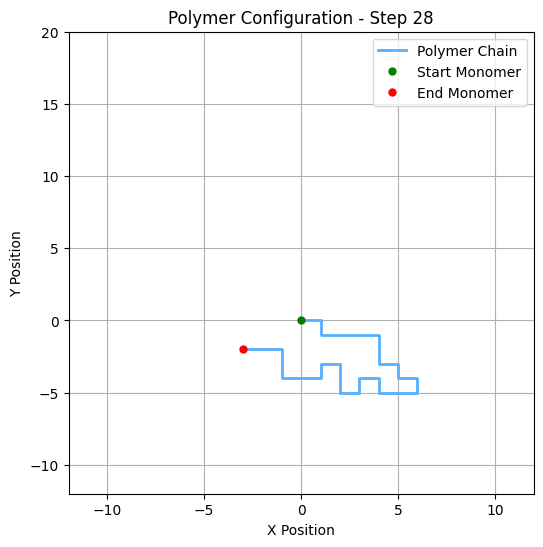

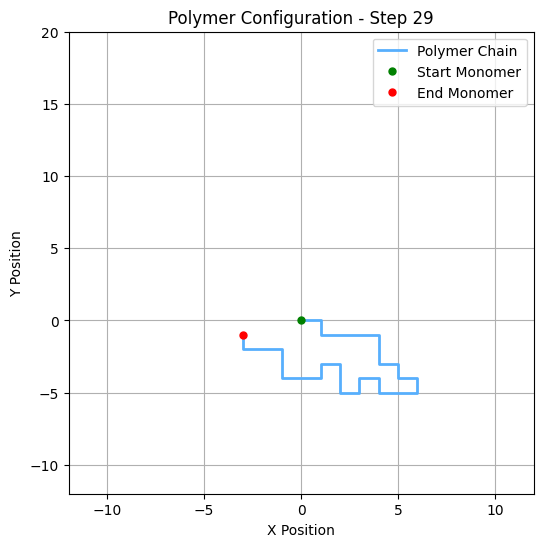

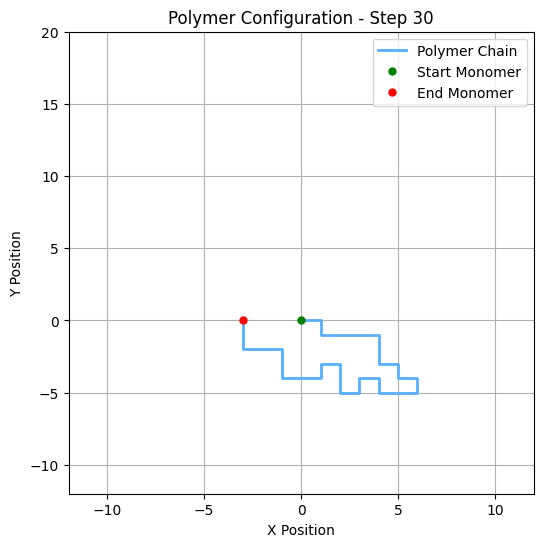

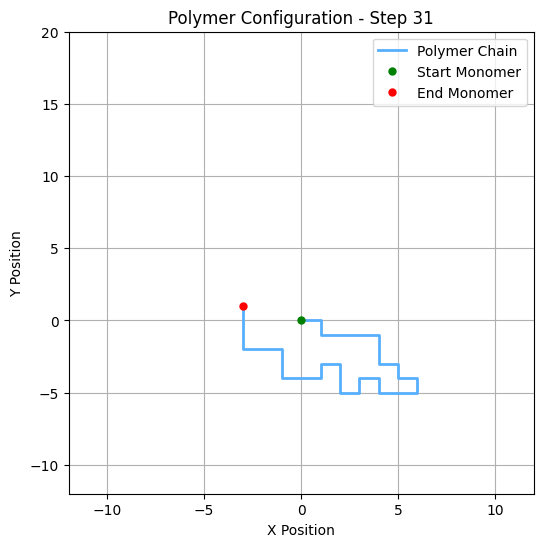

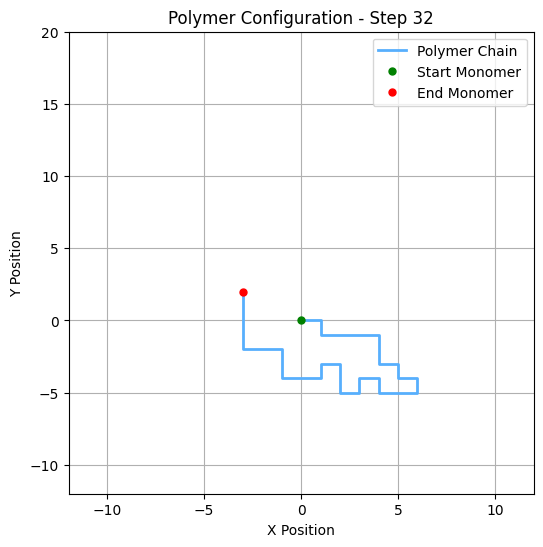

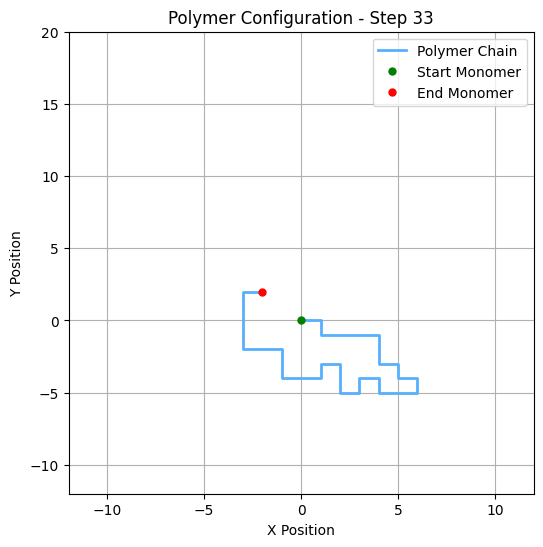

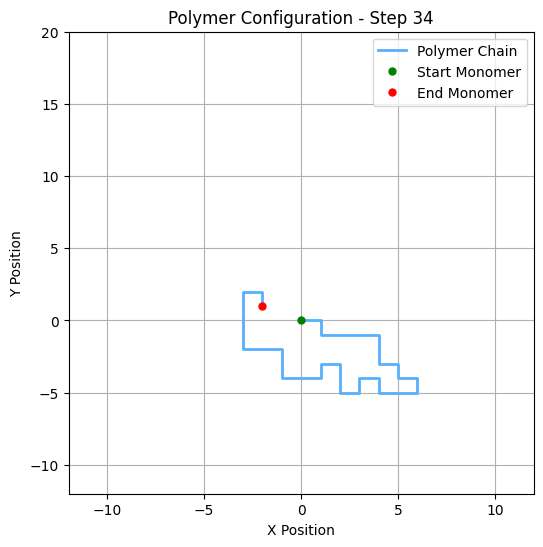

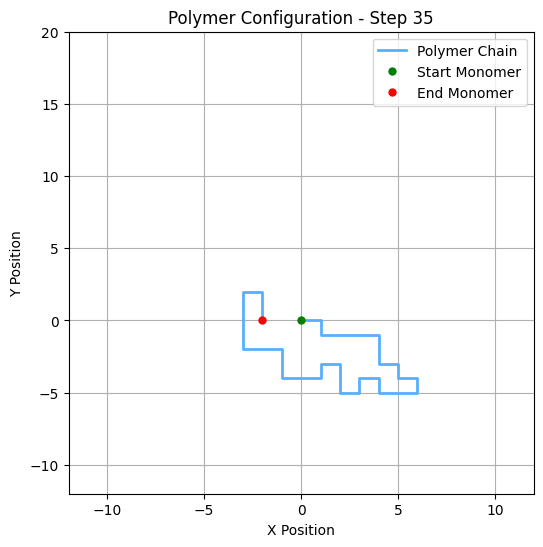

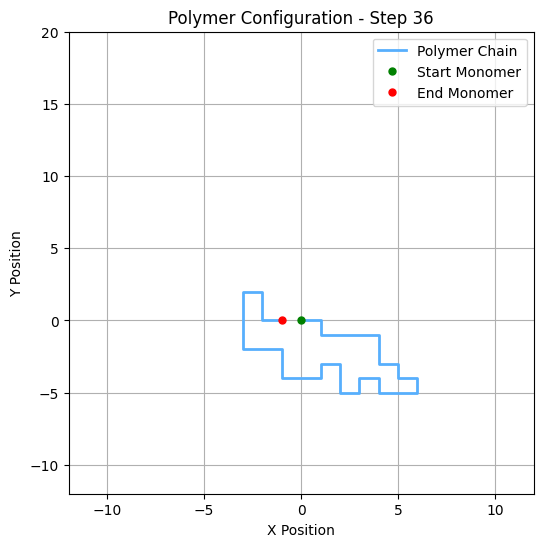

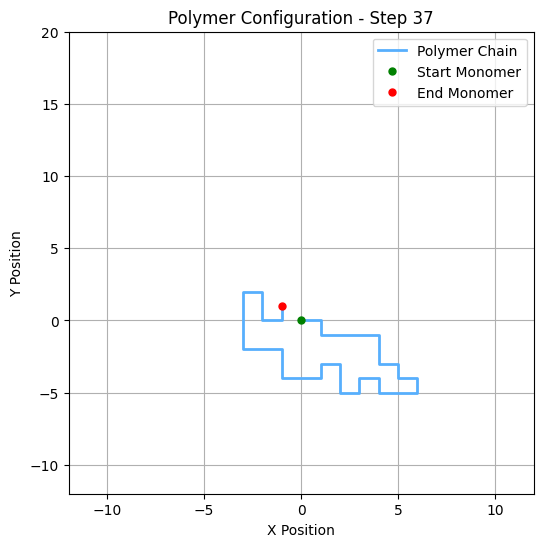

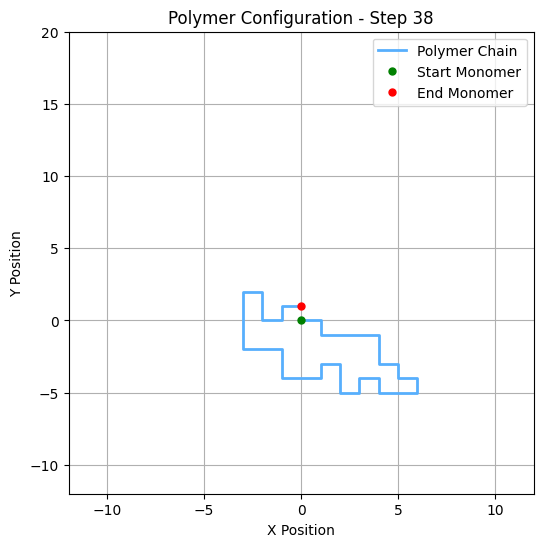

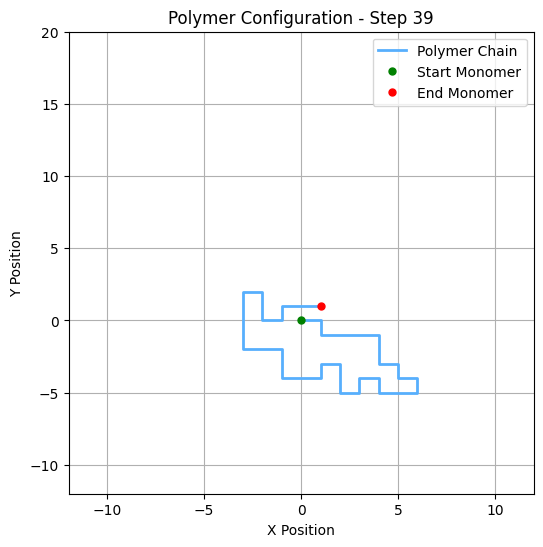

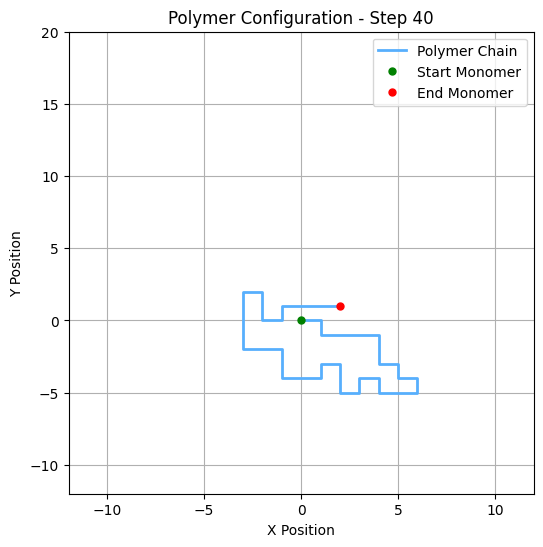

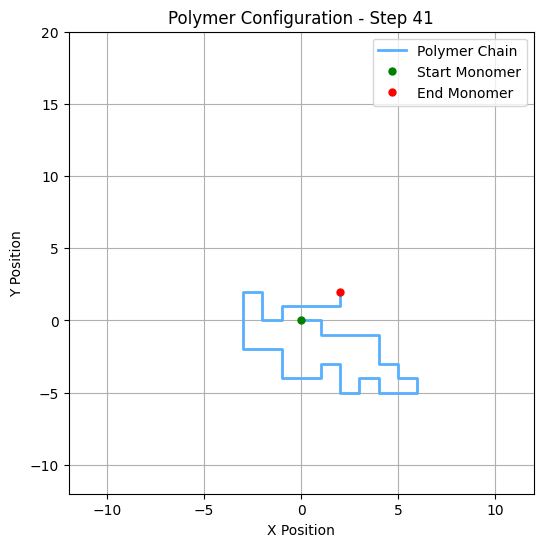

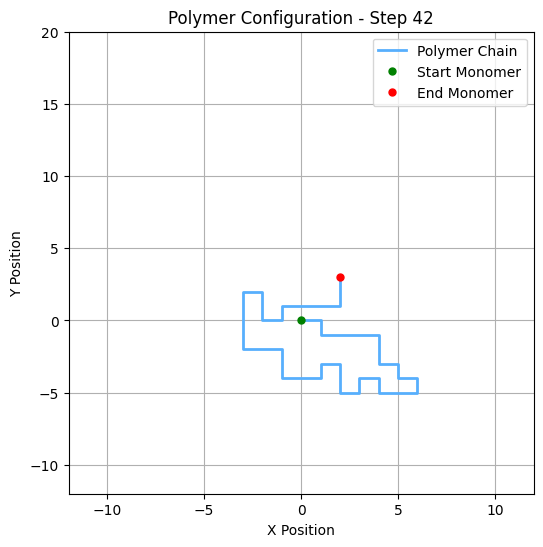

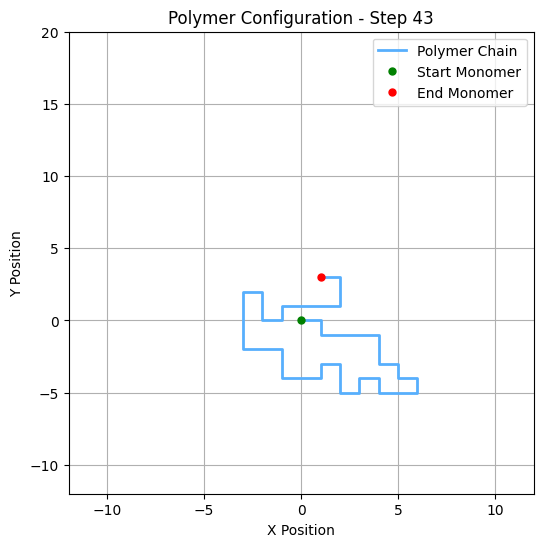

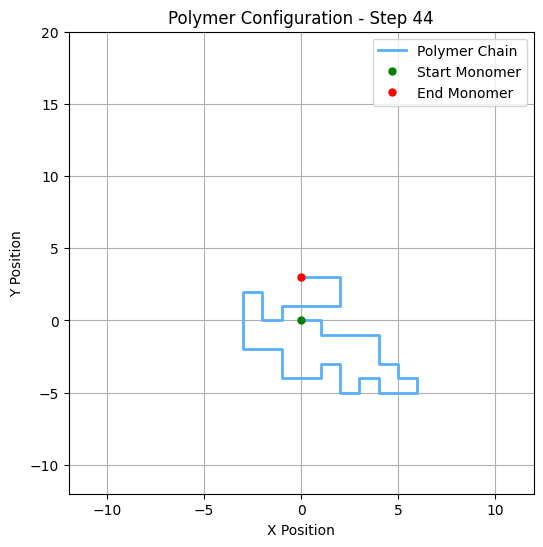

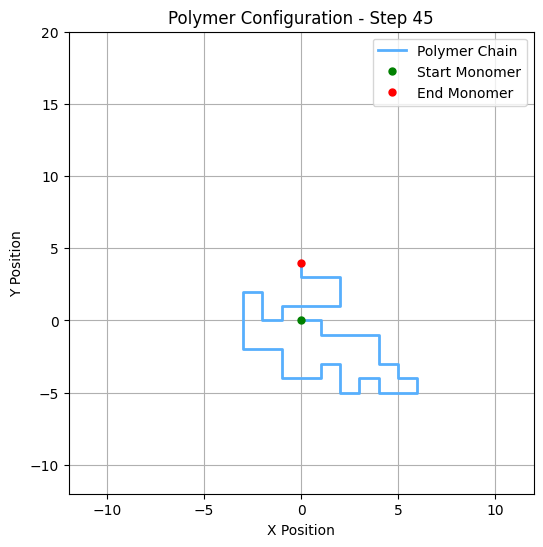

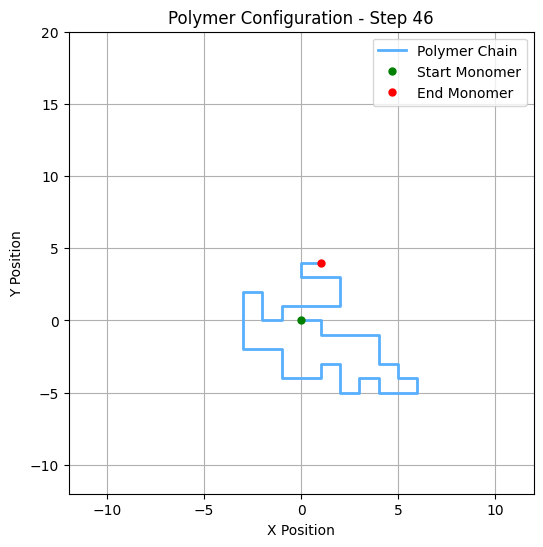

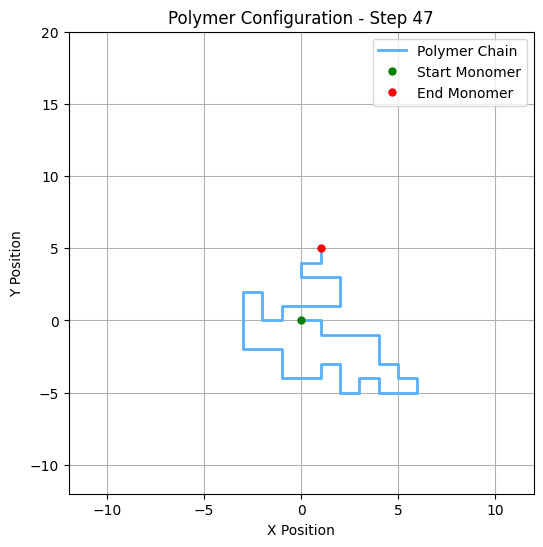

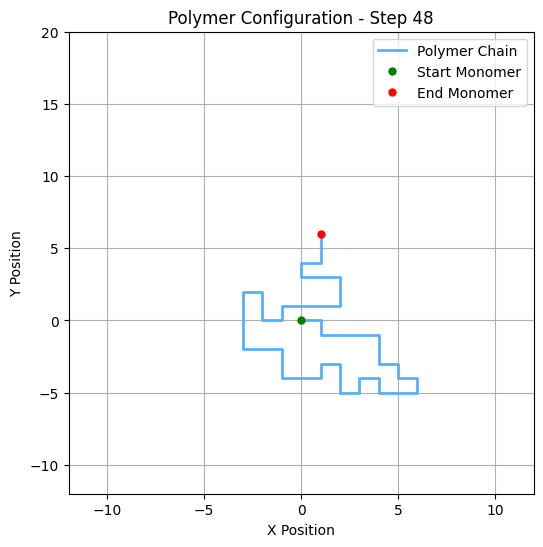

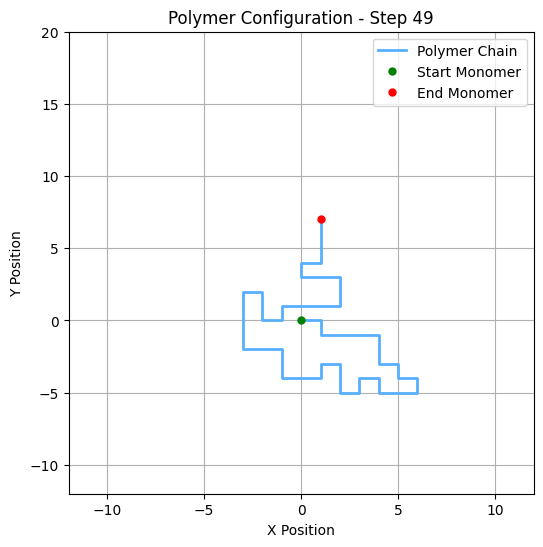

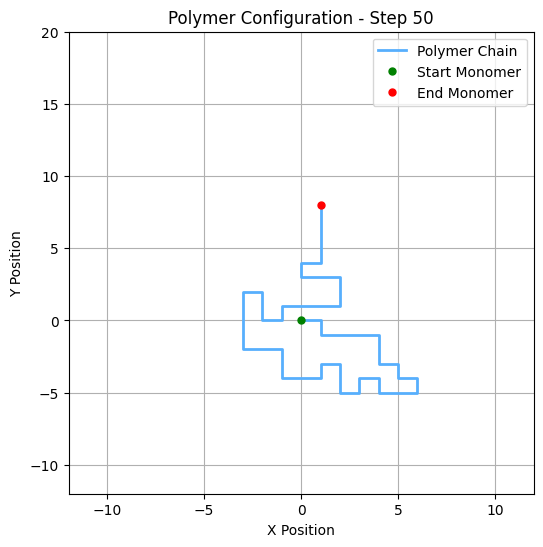

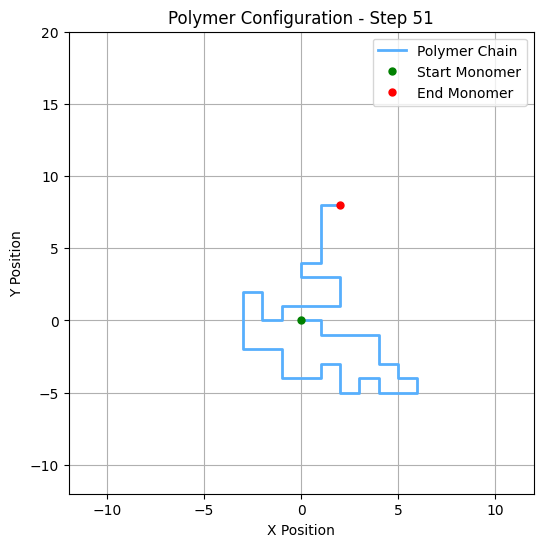

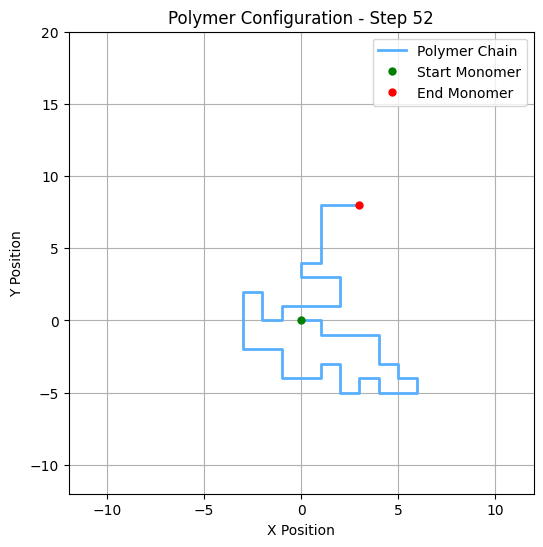

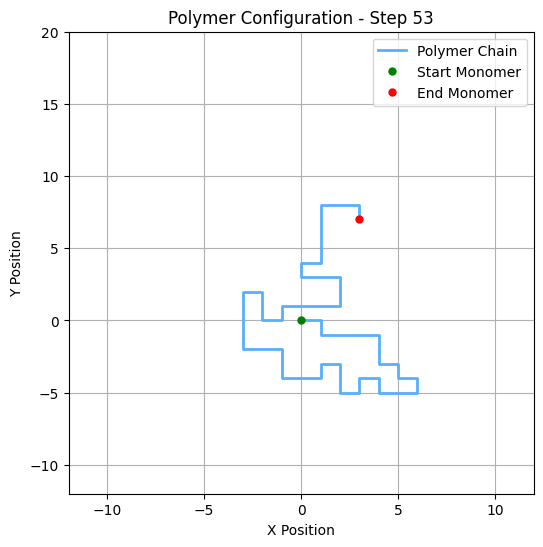

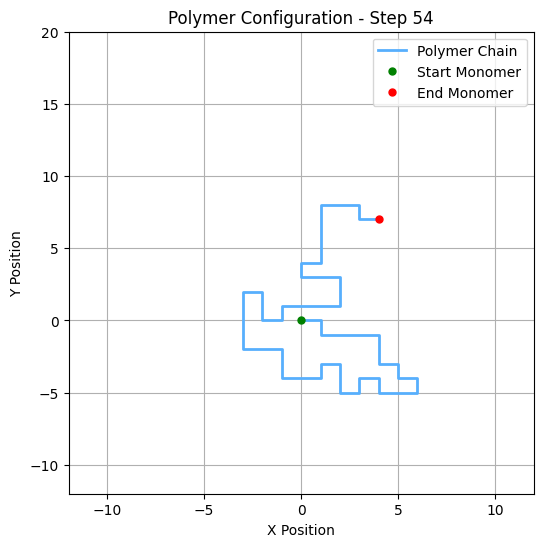

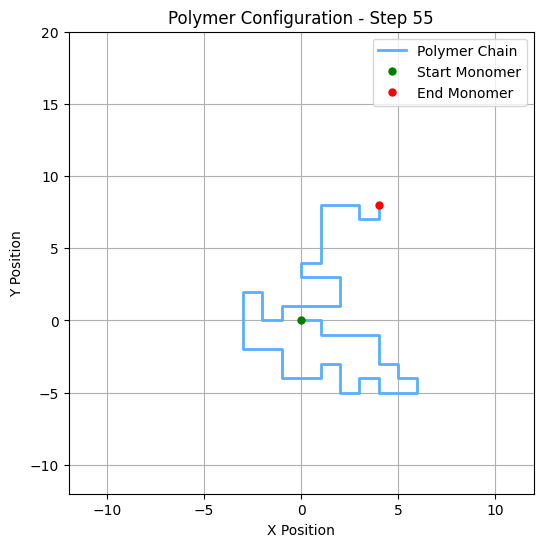

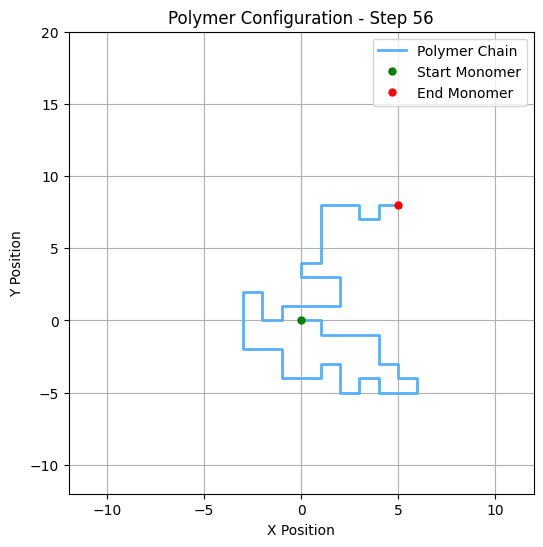

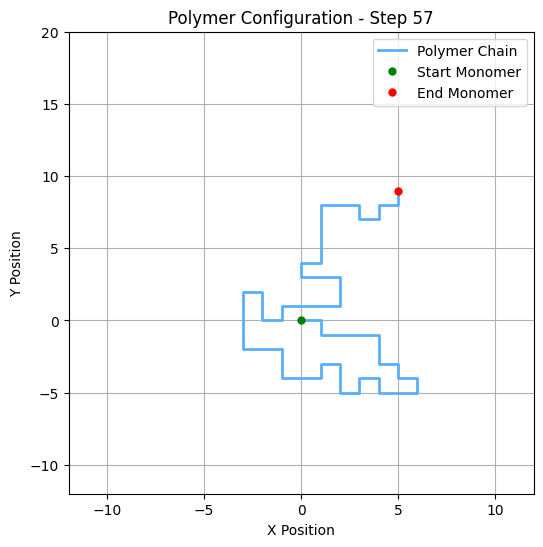

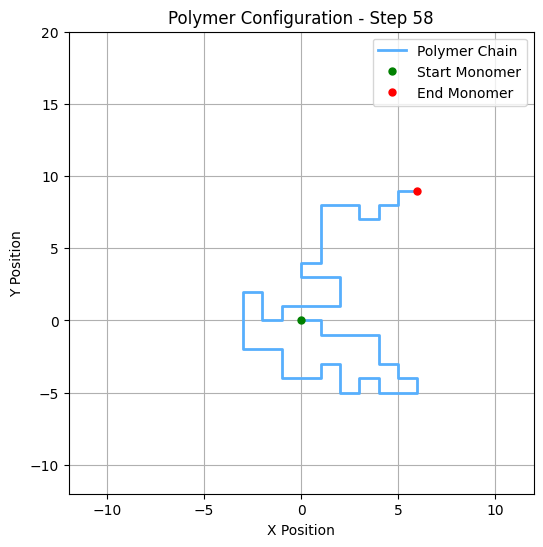

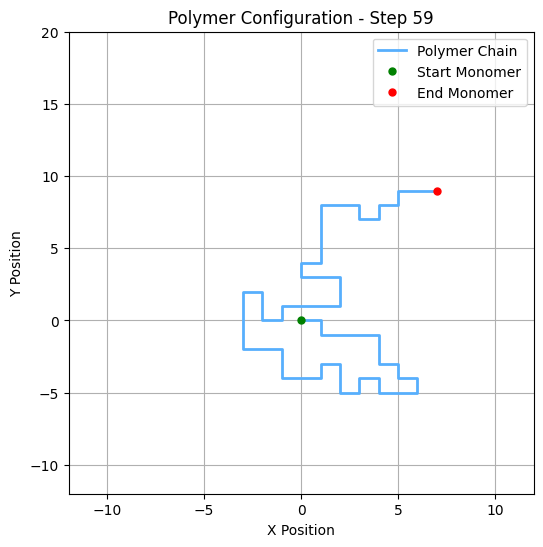

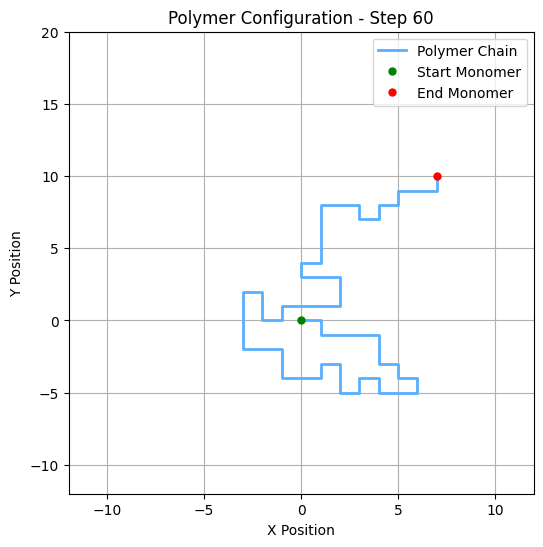

In [13]:
import matplotlib.pyplot as plt

def plot_polymer_steps(steps, L):
    """
    Plot the polymer configurations at each step stored in steps.
    
    Args:
    steps: List of polymer configurations at each step (list of lists of tuples).
    L: Size of the lattice (used to set plot limits).
    """
    for step_idx, step in enumerate(steps):
        plt.figure(figsize=(6, 6))
        plt.xlim(-L/5, L/5)
        plt.ylim(-L/5, L/3)
        plt.grid(True)
        plt.title(f"Polymer Configuration - Step {step_idx + 1}")
        
        x, y = zip(*step)  # Extract x and y coordinates
        plt.plot(x, y, '#57AFFD', lw=2, label="Polymer Chain")  # Plot polymer
        plt.plot(x[0], y[0], 'go', markersize=5, label="Start Monomer")  # Start monomer
        plt.plot(x[-1], y[-1], 'ro', markersize=5, label="End Monomer")  # End monomer
        
        plt.legend()
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.show()

# Example usage:
# Assuming `steps` is already generated using the `bfmc_algorithm` function.
plot_polymer_steps(steps, L=60)

0.0
1.0
2.0
3.0
4.0
4.123105625617661
4.47213595499958
5.385164807134504
6.324555320336759
6.708203932499369
7.615773105863909
8.54400374531753
8.94427190999916
9.433981132056603
8.602325267042627
8.06225774829855
7.211102550927978
7.810249675906654
8.48528137423857
7.810249675906654
7.211102550927978
8.06225774829855
8.602325267042627
9.219544457292887
10.0
10.63014581273465
11.313708498984761
10.63014581273465
10.0
9.219544457292887
9.899494936611665


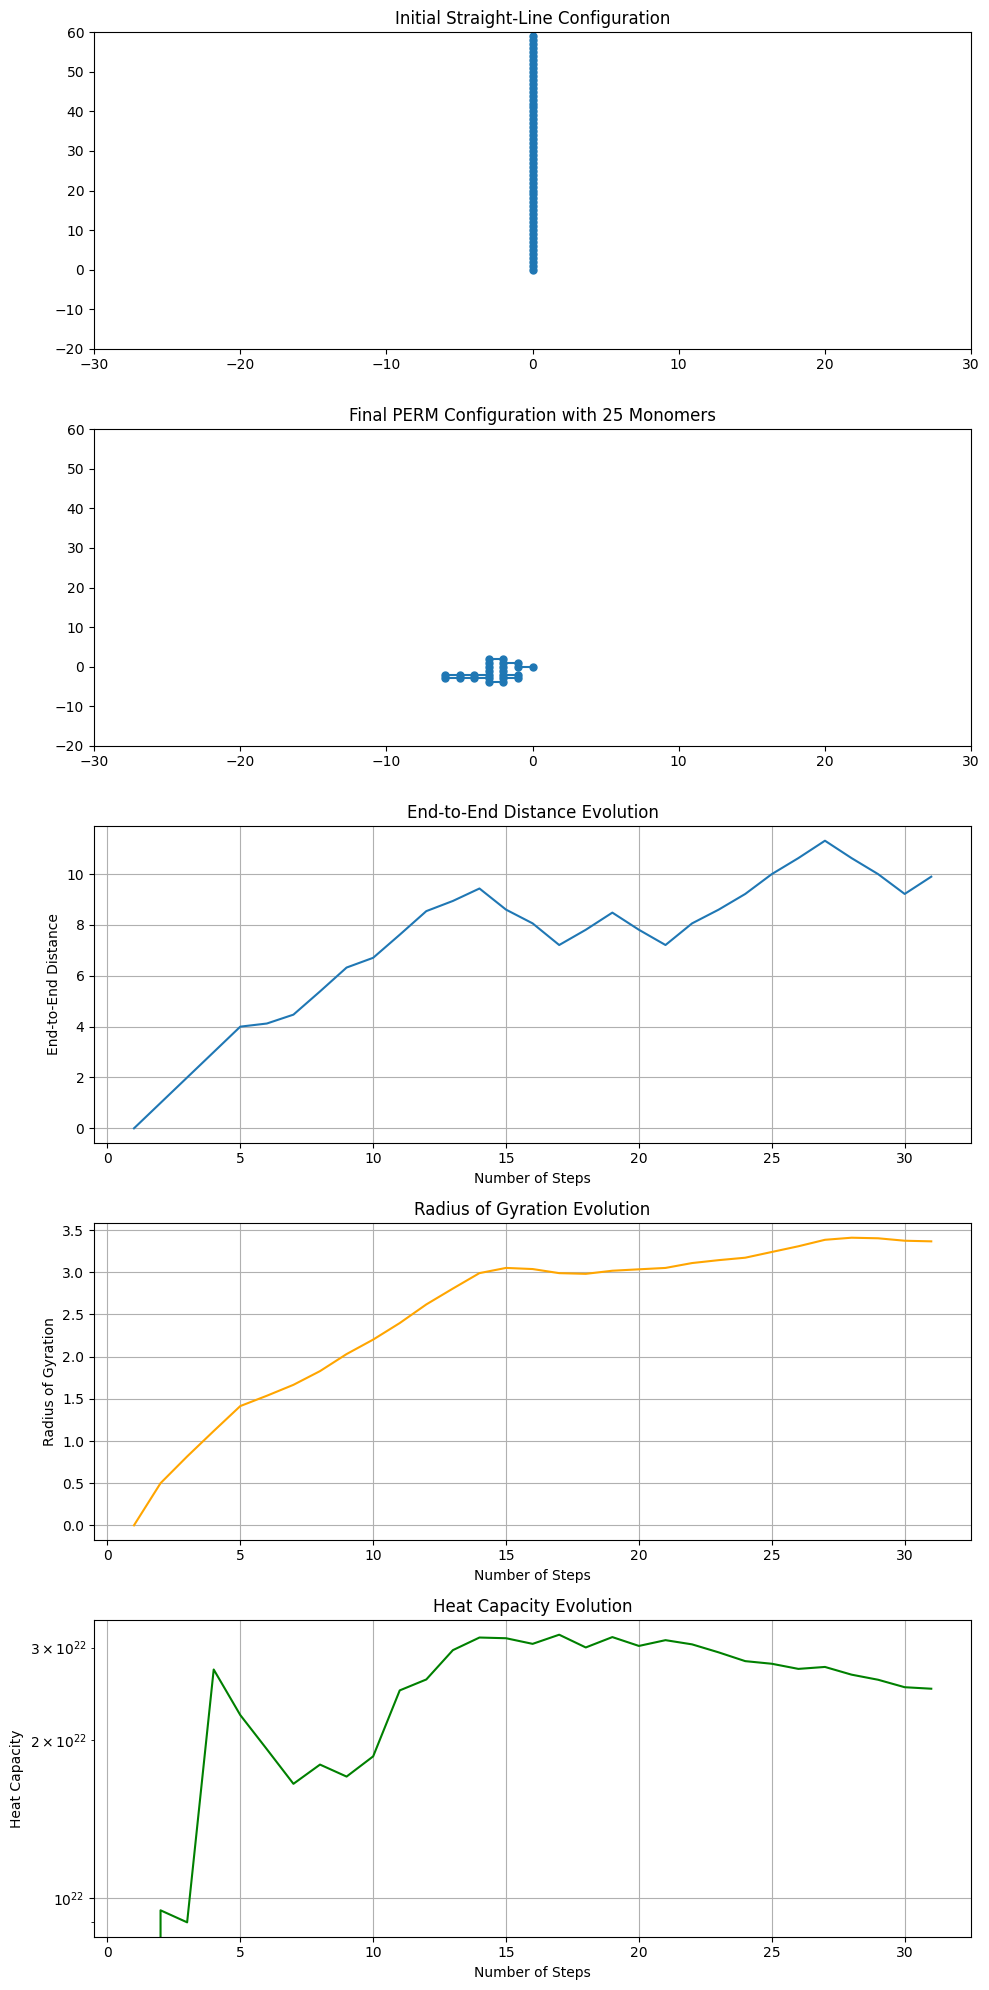

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
N = 60  # Number of monomers in the polymer
L = 12   # Size of the lattice

k_B = 1.380649*(10**-23) #1  # Boltzmann constant (can be set to 1 for simplicity)

# Generate the initial straight-line polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Generate polymer chain using simplified PERM
def perm_algorithm(N, L):
    """
    Generate a polymer chain using a simplified PERM-like algorithm.
    This version records the polymer at each step.
    """
    polymer = [(-1, -1)]  # Start at the origin
    all_steps = [list(polymer)]  # Store the initial polymer configuration
    
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 2D movement directions
    
    for _ in range(1, N):
        # Get the current position of the chain end
        x, y = polymer[-1]
        candidates = []
        
        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)
        
        # Check if we can proceed
        if not candidates:
            # If no valid moves, terminate early
            break
        
        # Assign uniform weights to the candidates
        weights = [1.0 for _ in candidates]  # Uniform weight for simplicity
        
        # Normalize weights
        probabilities = np.array(weights) / sum(weights)
        
        # Select the next position based on weights
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
        
        # Record the current polymer configuration
        all_steps.append(list(polymer))
    
    return all_steps

# Heat Capacity Calculation
def calculate_heat_capacity(energies, T):
    """Calculate heat capacity from energy fluctuations."""
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.array(energies) ** 2)
    Cv = (mean_E2 - mean_E**2) / (k_B * T**2)
    return Cv

# End-to-End Distance
def calculate_end_to_end_distance(polymer):
    """Calculate the end-to-end distance of the polymer."""
    r_start = np.array(polymer[0])
    r_end = np.array(polymer[-1])
    print(np.linalg.norm(r_end - r_start))
    return np.linalg.norm(r_end - r_start)

# Radius of Gyration
def calculate_radius_of_gyration(polymer):
    """Calculate the radius of gyration of the polymer."""
    positions = np.array(polymer)
    center_of_mass = np.mean(positions, axis=0)
    squared_distances = np.sum((positions - center_of_mass) ** 2, axis=1)
    Rg = np.sqrt(np.mean(squared_distances))
    return Rg

# Generate configurations
initial_polymer = initialize_polymer(N)
steps = perm_algorithm(N, L)

# Store values for each step
end_to_end_distances = []
radius_of_gyration = []
energies = []  # You can modify this if you have an energy function

# Simulating energy values (for demonstration purposes)
# You should replace this with actual energy calculations if you have a potential function.
energy_function = lambda polymer: np.random.uniform(1, 5)  # Random energy for example

# Loop through steps and calculate the properties
for step in steps:
    end_to_end_distances.append(calculate_end_to_end_distance(step))
    radius_of_gyration.append(calculate_radius_of_gyration(step))
    energies.append(energy_function(step))  # Store energy for each step

# Calculate heat capacity for each step (using a fixed temperature T for simplicity)
T = 2  # 
heat_capacity_values = [calculate_heat_capacity(energies[:i+1], T) for i in range(len(energies))]

# Plot the results
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Initial configuration
x_init, y_init = zip(*initial_polymer)
axs[0].plot(x_init, y_init, '-o', markersize=5)
axs[0].set_xlim(-30, 30)
axs[0].set_ylim(-20, 60)
axs[0].set_title("Initial Straight-Line Configuration")

# Final configuration
x_final, y_final = zip(*final_polymer)
axs[1].plot(x_final, y_final, '-o', markersize=5)
axs[1].set_xlim(-30, 30)
axs[1].set_ylim(-20, 60)
axs[1].set_title(f"Final PERM Configuration with {len(final_polymer)} Monomers")

# Plot End-to-End Distance
axs[2].plot(range(1, len(end_to_end_distances) + 1), end_to_end_distances, label="End-to-End Distance")
axs[2].set_xlabel("Number of Steps")
axs[2].set_ylabel("End-to-End Distance")
axs[2].set_title("End-to-End Distance Evolution")
axs[2].grid(True)

# Plot Radius of Gyration
axs[3].plot(range(1, len(radius_of_gyration) + 1), radius_of_gyration, label="Radius of Gyration", color='orange')
axs[3].set_xlabel("Number of Steps")
axs[3].set_ylabel("Radius of Gyration")
axs[3].set_title("Radius of Gyration Evolution")
axs[3].grid(True)

# Plot Heat Capacity
axs[4].plot(range(1, len(heat_capacity_values) + 1), heat_capacity_values, label="Heat Capacity", color='green')
axs[4].set_yscale("log")
axs[4].set_xlabel("Number of Steps")
axs[4].set_ylabel("Heat Capacity")
axs[4].set_title("Heat Capacity Evolution")
axs[4].grid(True)

# Adjust layout
plt.tight_layout()



# Finding critical temperature


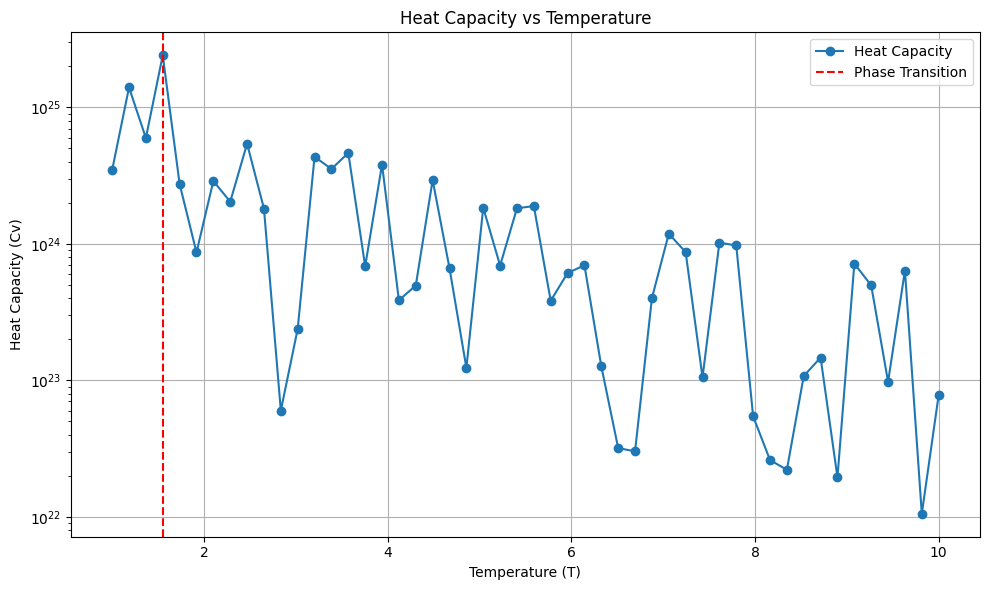

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of monomers in the polymer
L = 120  # Size of the lattice
k_B = 1.380649 * 10**-23  # Boltzmann constant
epsilon = 0.1  # Interaction energy scale
temperature_range = np.linspace(1, 10, 50)  # Example range

# Generate the initial straight-line polymer
def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

# Calculate the energy of the polymer
def calculate_energy(polymer):
    """Calculate the energy of the polymer configuration."""
    energy = 0.0
    for i in range(1, len(polymer)):
        x1, y1 = polymer[i - 1]
        x2, y2 = polymer[i]
        bond_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        energy += (bond_length )**2  # Harmonic potential
        ###print(energy) STAY HIGHLIGHTED
        #energy = lambda polymer: np.random.uniform(1, 5)

    return energy

# Generate polymer chain using simplified PERM
def perm_algorithm(N, L):
    """Generate a polymer chain using a simplified PERM-like algorithm."""
    polymer = [(-1, -1)]  # Start at the origin
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 2D movement directions
    energies = []  # To store energy at each step

    for _ in range(1, N):
        x, y = polymer[-1]
        candidates = []

        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)

        if not candidates:  # No valid moves, terminate early
            break

        weights = [1.0 for _ in candidates]  # Uniform weight
        probabilities = np.array(weights) / sum(weights)
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
        
        # Record energy
        energies.append(calculate_energy(polymer))

    return polymer, energies

# Calculate heat capacity
def calculate_heat_capacity(energies, T):
    """Calculate heat capacity from energy fluctuations."""
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.array(energies)**2)
    return (mean_E2 - mean_E**2) / (k_B * T**2)

# Analyze across temperatures
heat_capacities = []
temperatures = []
for T in temperature_range:
    _, energies = perm_algorithm(N, L)
    Cv = calculate_heat_capacity(energies, T)
    heat_capacities.append(Cv)
    temperatures.append(T)

# Plot the heat capacity vs temperature
plt.figure(figsize=(10, 6))
plt.plot(temperatures, heat_capacities, '-o', label="Heat Capacity")
plt.axvline(x=temperatures[np.argmax(heat_capacities)], color='red', linestyle='--', label="Phase Transition")
plt.xlabel("Temperature (T)")
plt.ylabel("Heat Capacity (Cv)")
plt.title("Heat Capacity vs Temperature")
plt.yscale("log")  # Log scale for better visualization
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Phase Transition for PERM

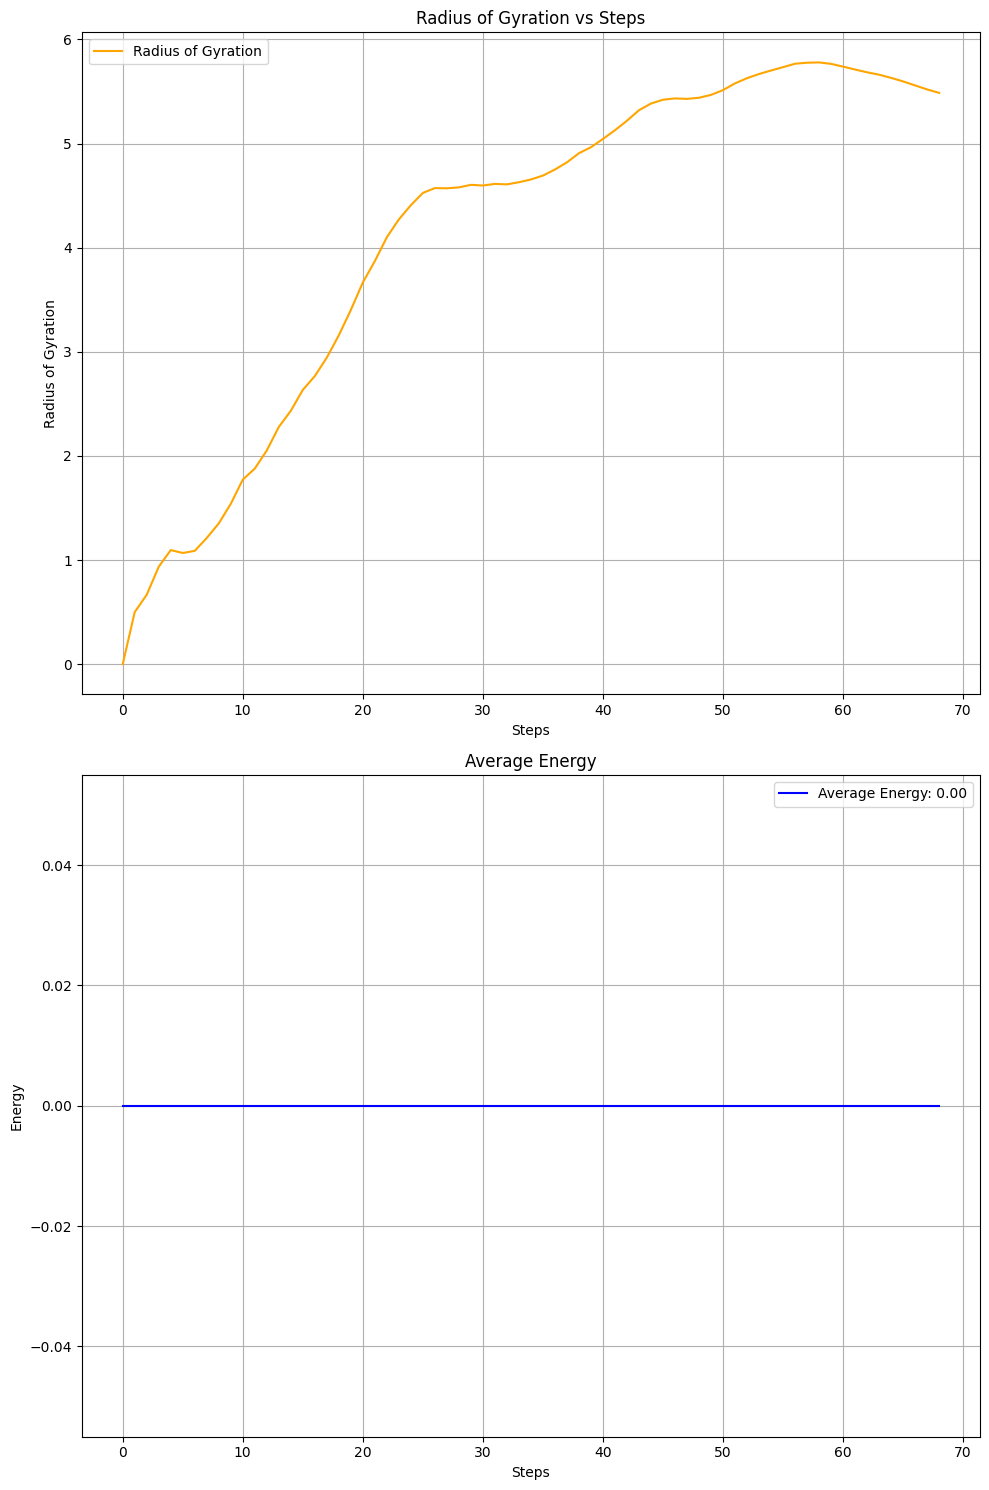

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of monomers
L = 50   # Lattice size
T = 1.5  # Temperature
T_c = 1.0  # Critical temperature
k_B = 1.0  # Boltzmann constant
epsilon_repulsive = 1.0
epsilon_attractive = lambda T: 2.0 * max(0, (1 - T / T_c))  # Attractive term
lambda_attraction = 2.0  # Range of attractive interaction
W_min = 1e-3  # Pruning threshold
W_max = 1e3   # Enrichment threshold

# Initialize the polymer
def initialize_polymer():
    return [(0, 0)]  # Start with the first monomer at the origin

# Calculate energy
def calculate_energy(polymer, T):
    energy = 0.0
    # Bond stretching energy
    for i in range(1, len(polymer)):
        x1, y1 = polymer[i-1]
        x2, y2 = polymer[i]
        bond_length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        energy += (bond_length - 1)**2

    # Non-bonded interactions
    for i in range(len(polymer)):
        for j in range(i+1, len(polymer)):
            x1, y1 = polymer[i]
            x2, y2 = polymer[j]
            r_ij = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            if r_ij < 1.0:
                energy += epsilon_repulsive / r_ij
            if r_ij > 0:
                energy -= epsilon_attractive(T) * np.exp(-r_ij / lambda_attraction)
    
    return energy

# PERM Algorithm
def perm_algorithm(N, T):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Allowed lattice moves
    polymer = initialize_polymer()
    weights = [1.0]  # Initialize weight
    all_steps = [list(polymer)]  # Store configurations
    total_weighted_energies = 0.0
    total_weights = 0.0

    while len(polymer) < N:
        # Get current position
        x, y = polymer[-1]
        candidates = []
        candidate_weights = []

        # Propose moves
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:  # Avoid overlaps
                candidates.append(new_pos)

        # Check if there are valid moves
        if not candidates:
            break

        # Assign weights to valid candidates
        for new_pos in candidates:
            temp_polymer = polymer + [new_pos]
            candidate_weights.append(np.exp(-calculate_energy(temp_polymer, T) / (k_B * T)))

        # Normalize weights
        candidate_weights = np.array(candidate_weights)
        probabilities = candidate_weights / np.sum(candidate_weights)
        selected_move = np.random.choice(len(candidates), p=probabilities)
        polymer.append(candidates[selected_move])

        # Update weight
        weights.append(weights[-1] * len(candidates))
        all_steps.append(list(polymer))

        # Pruning and enrichment
        current_weight = weights[-1]
        if current_weight > W_max:
            weights[-1] /= 2  # Halve the weight
            polymer = polymer.copy()  # Duplicate configuration
        elif current_weight < W_min:
            if np.random.rand() > 0.5:  # Prune with 50% probability
                return all_steps, total_weighted_energies / total_weights if total_weights > 0 else None

        # Record contributions for energy averaging
        total_weighted_energies += calculate_energy(polymer, T) * weights[-1]
        total_weights += weights[-1]

    return all_steps, total_weighted_energies / total_weights if total_weights > 0 else None

# Simulate using PERM
steps, avg_energy = perm_algorithm(N, T)

# Analyze Results
radius_of_gyration = [
    np.sqrt(np.mean([(x - np.mean([p[0] for p in step]))**2 + (y - np.mean([p[1] for p in step]))**2 for x, y in step]))
    for step in steps
]

# Plot Results
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Radius of Gyration
axs[0].plot(range(len(radius_of_gyration)), radius_of_gyration, label="Radius of Gyration", color="orange")
axs[0].set_title("Radius of Gyration vs Steps")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Radius of Gyration")
axs[0].grid(True)
axs[0].legend()

# Average Energy
axs[1].plot(range(len(steps)), [avg_energy] * len(steps), label=f"Average Energy: {avg_energy:.2f}", color="blue")
axs[1].set_title("Average Energy")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Energy")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


# Step by Step

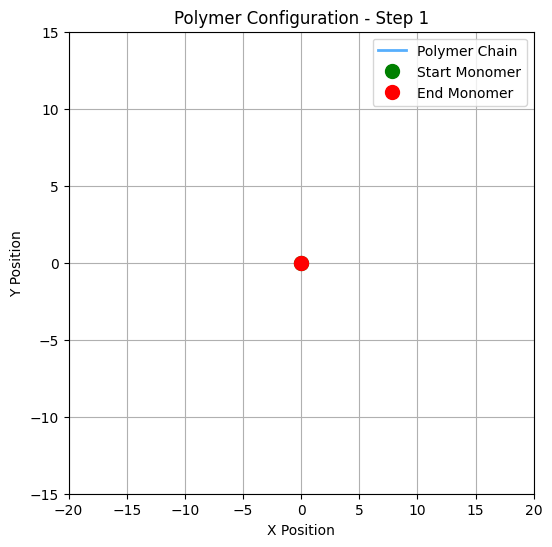

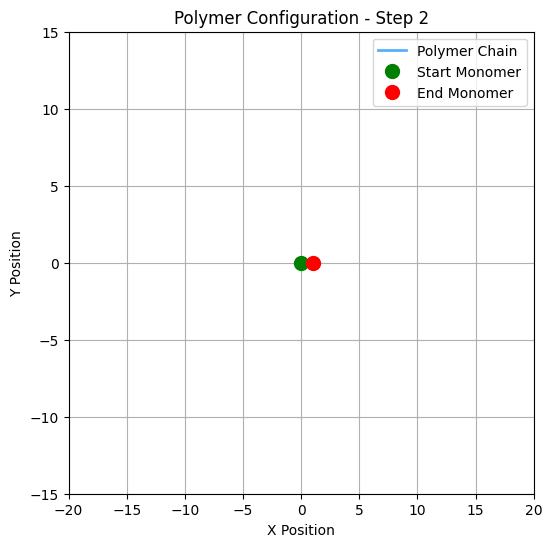

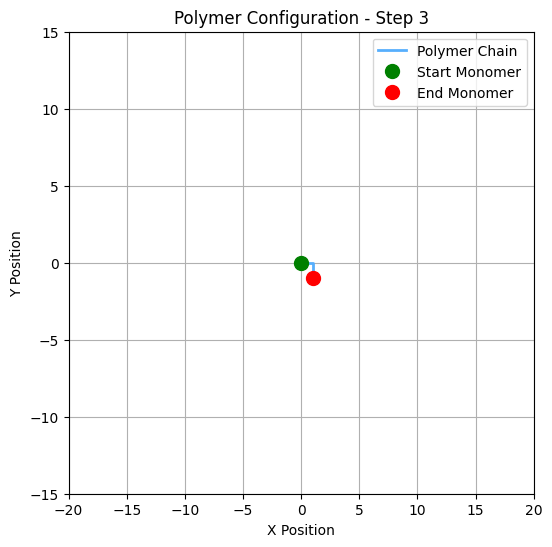

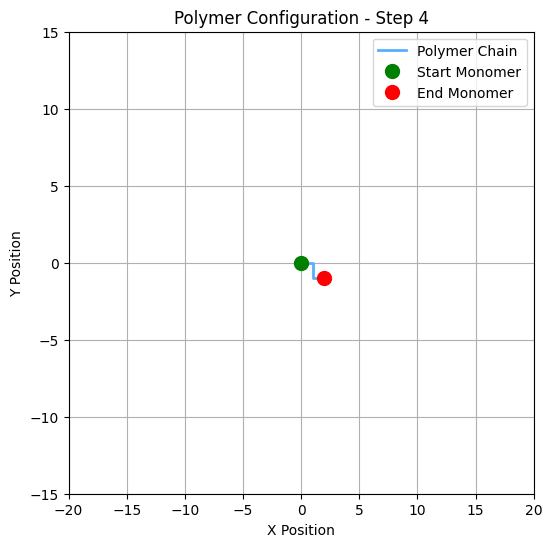

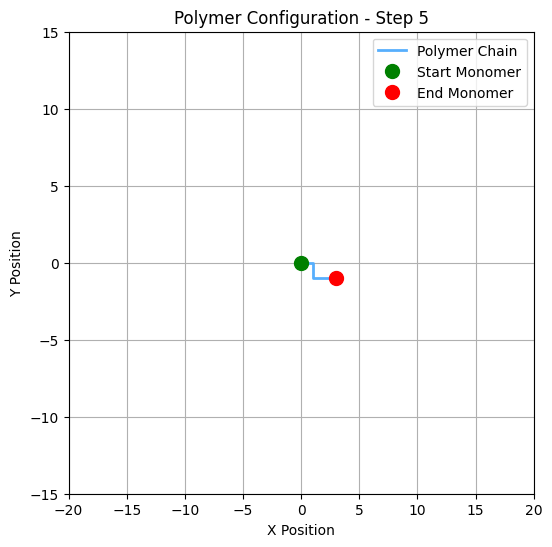

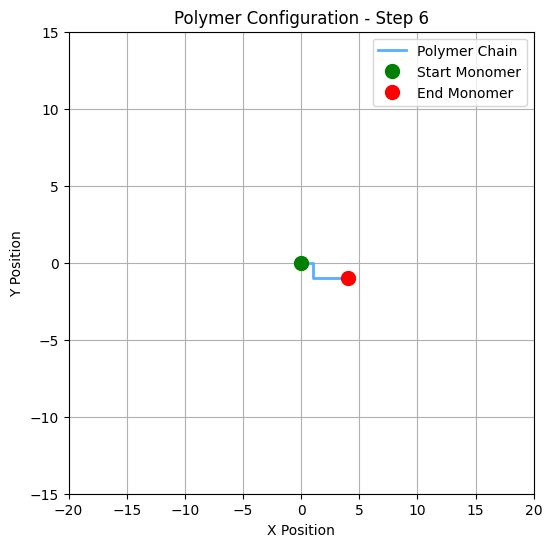

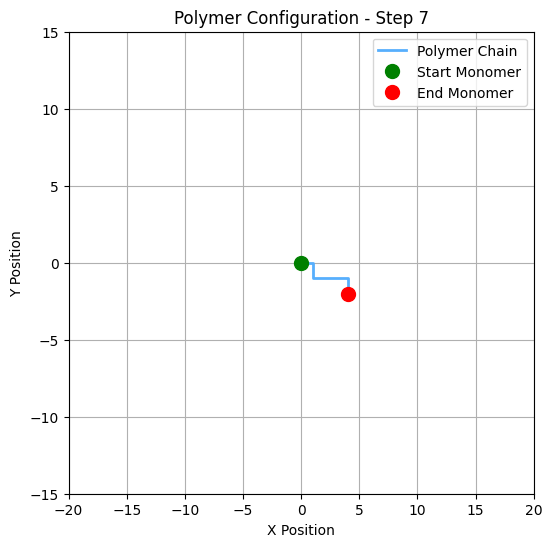

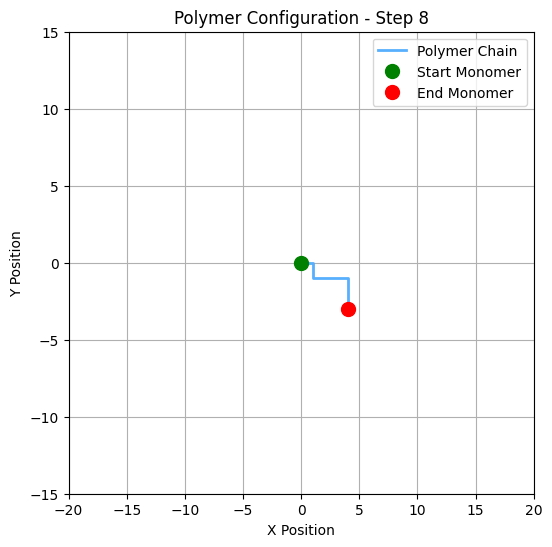

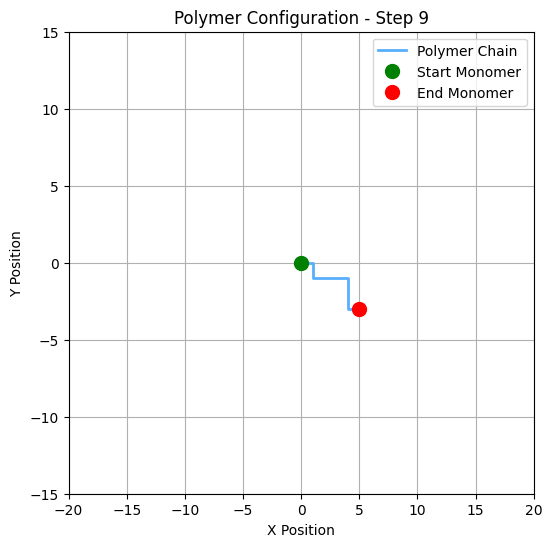

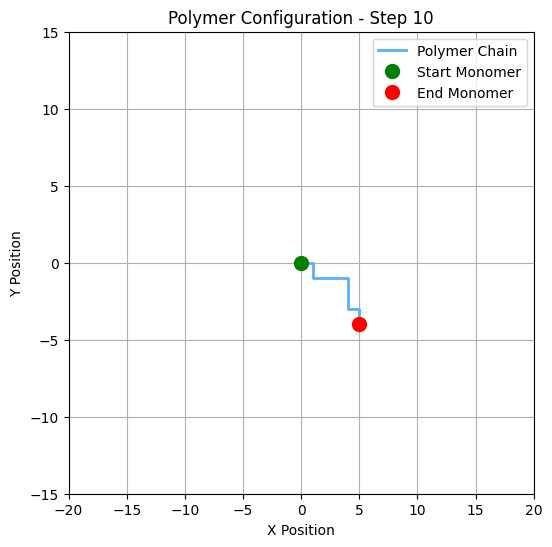

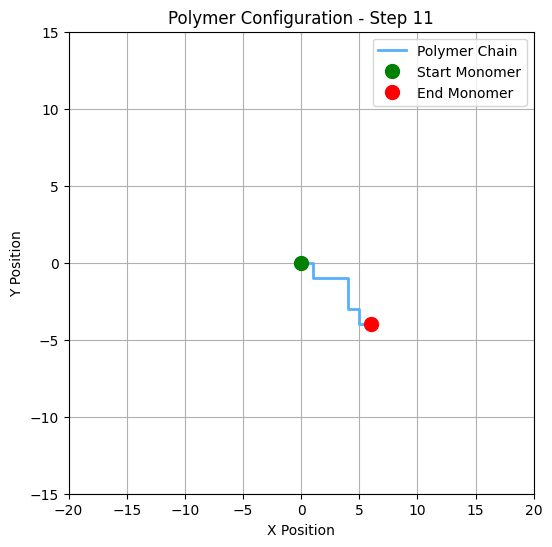

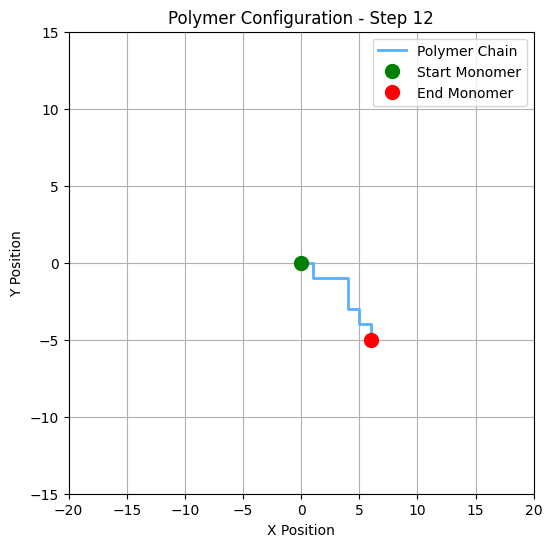

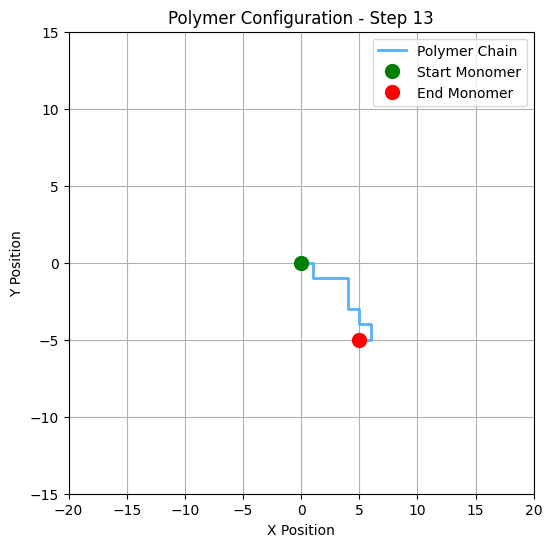

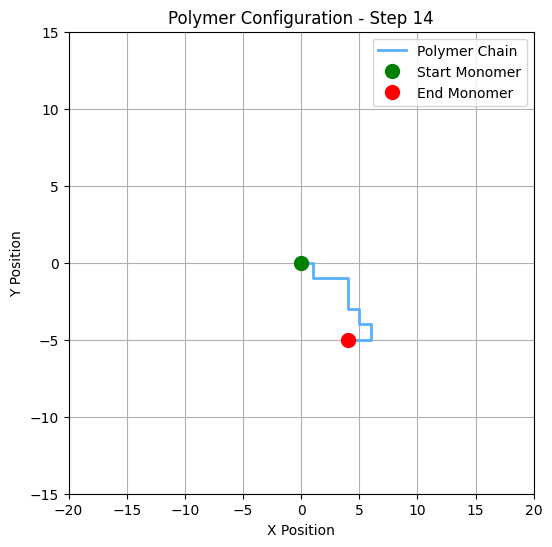

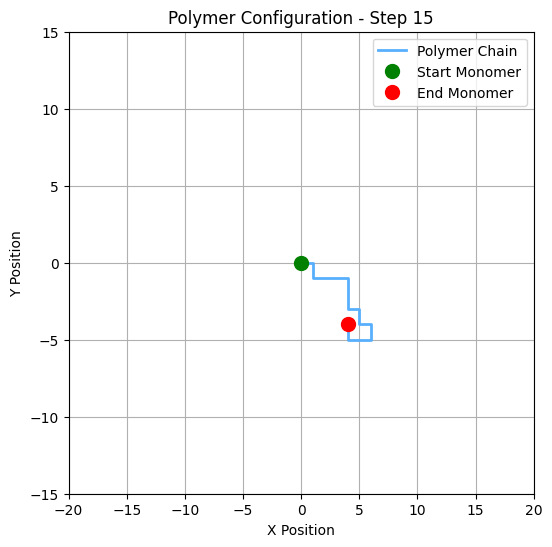

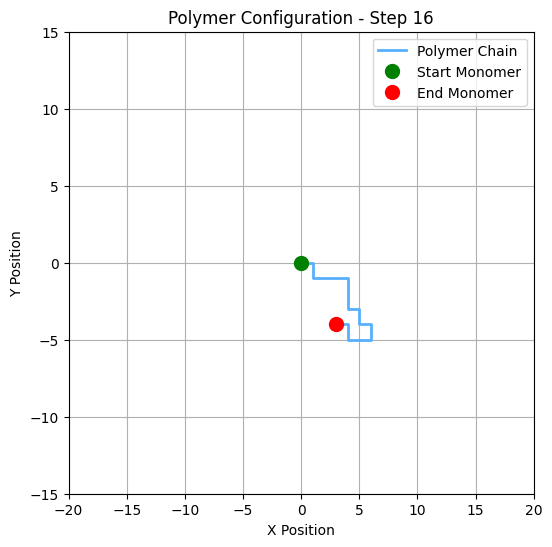

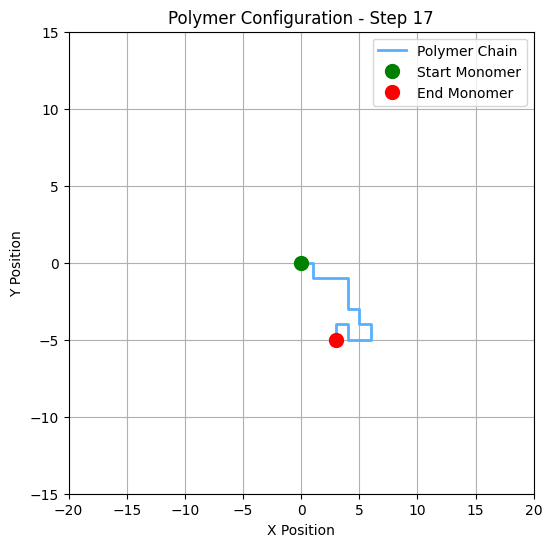

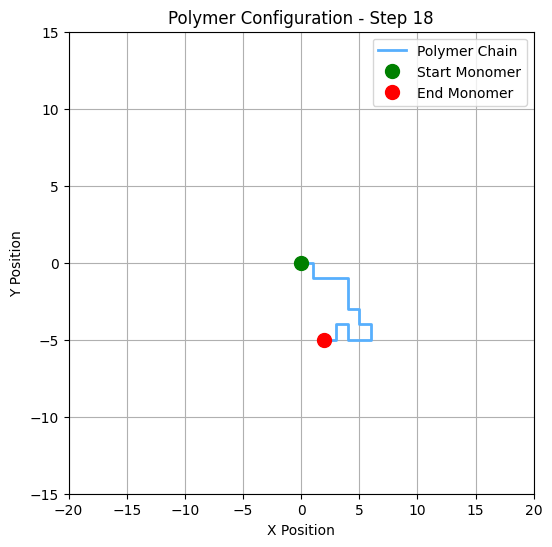

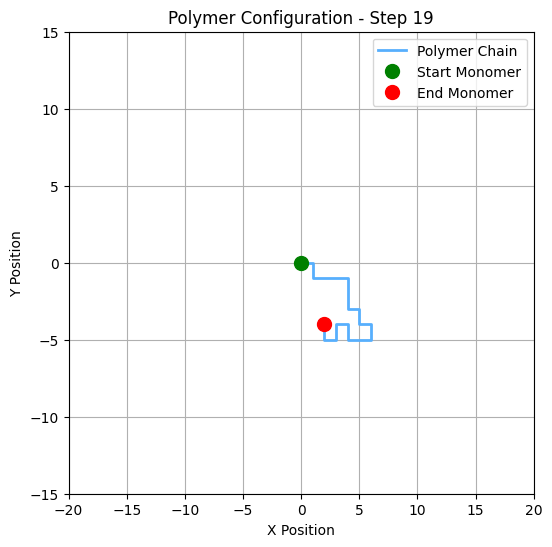

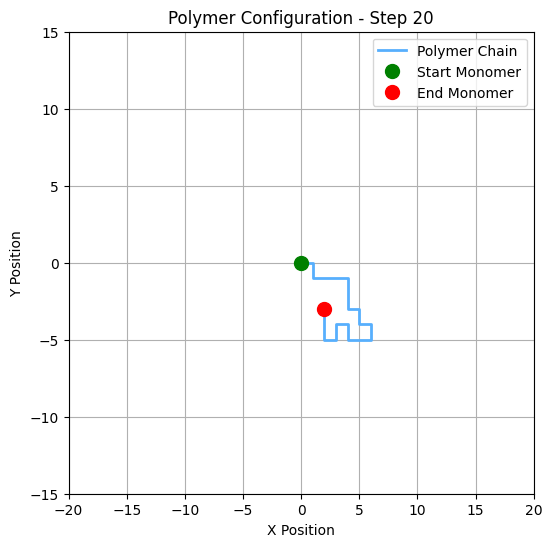

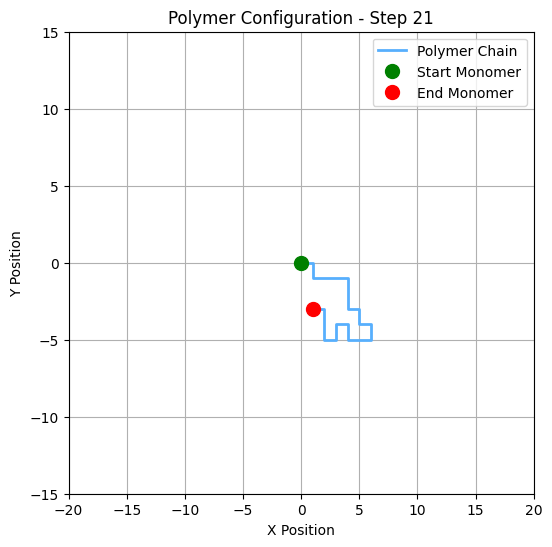

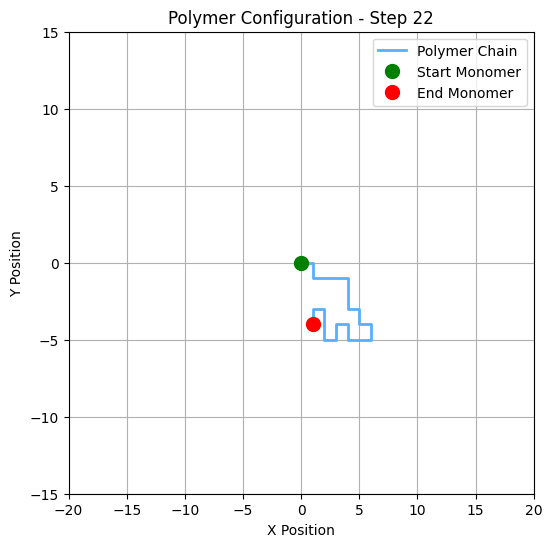

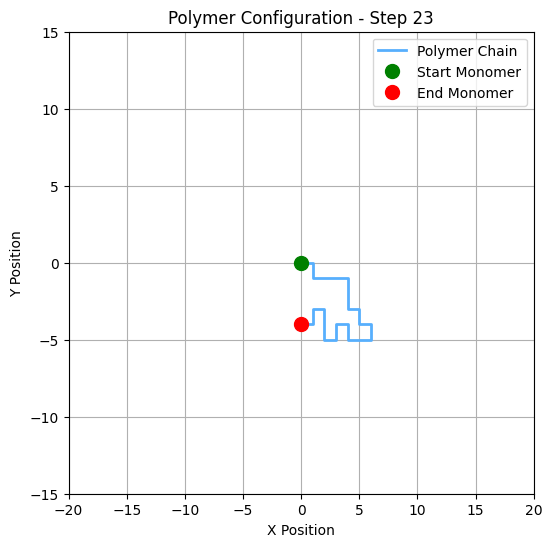

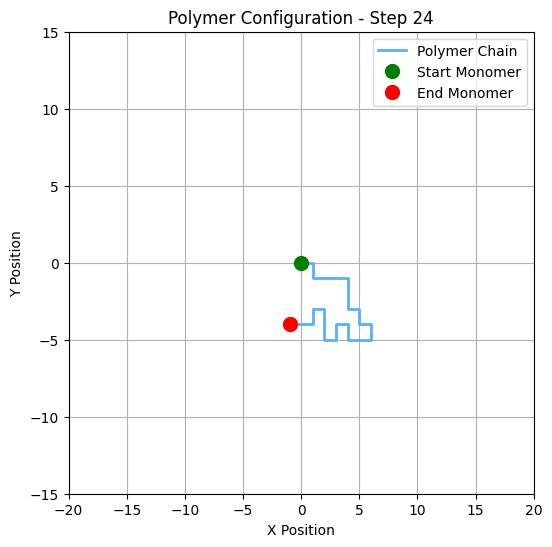

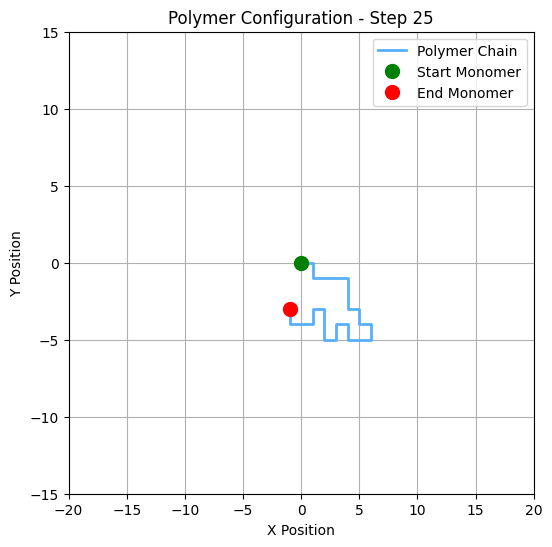

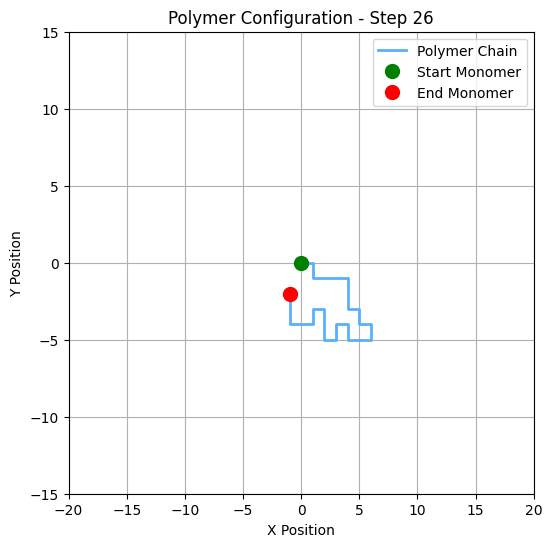

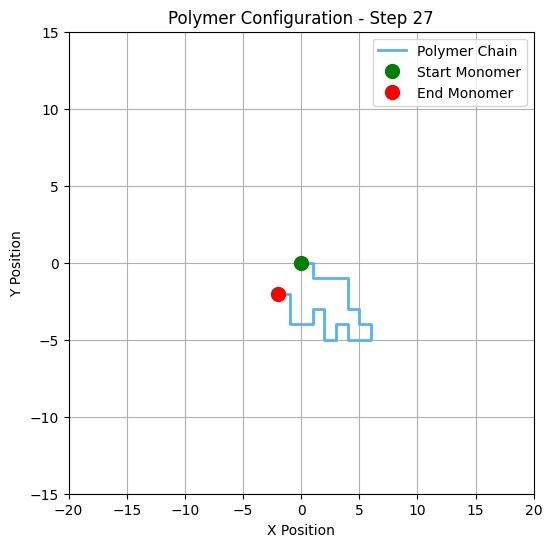

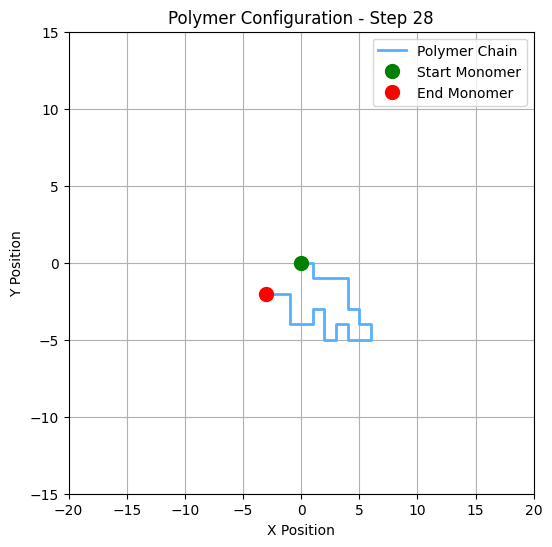

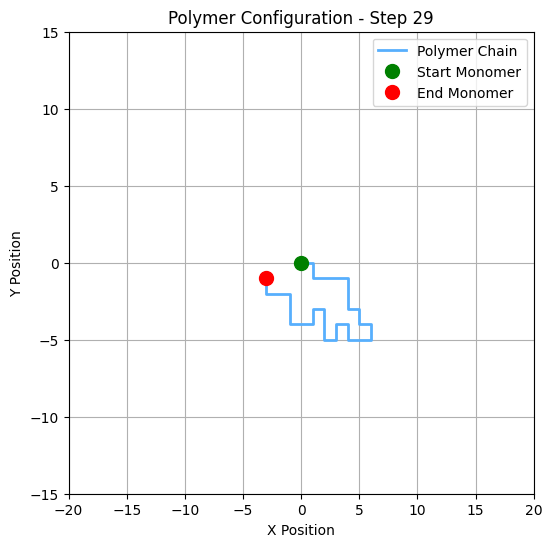

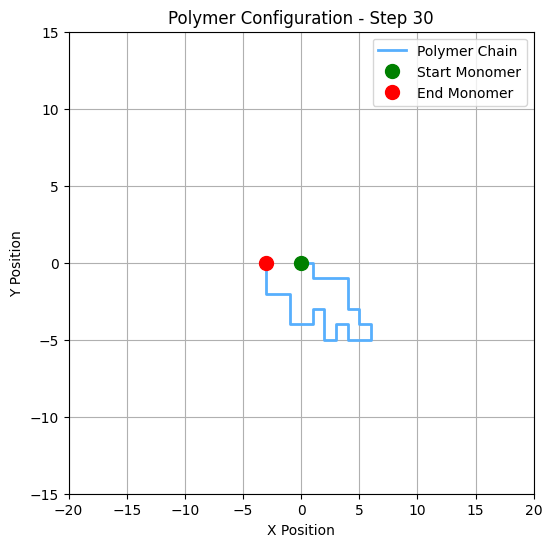

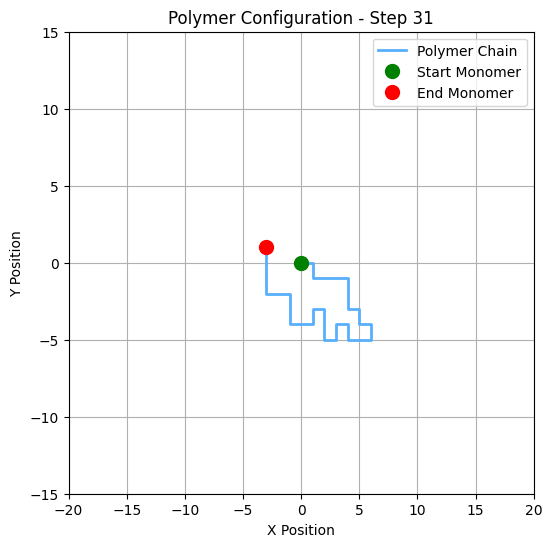

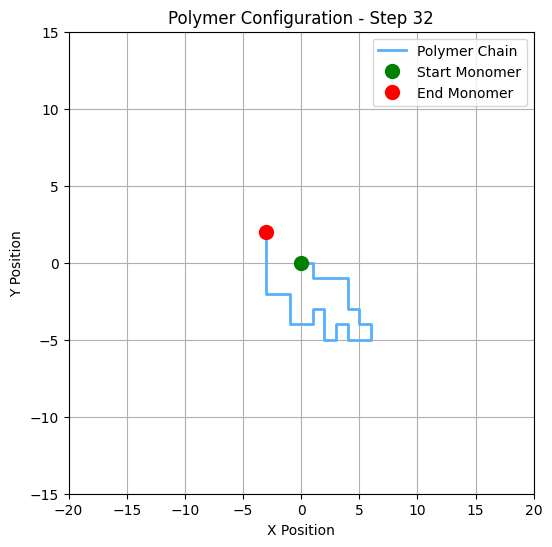

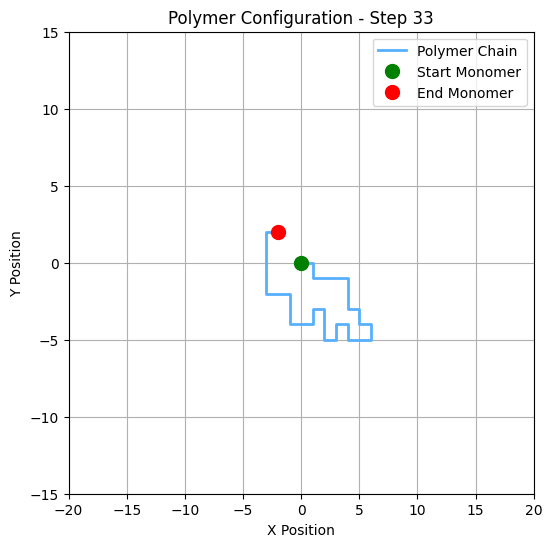

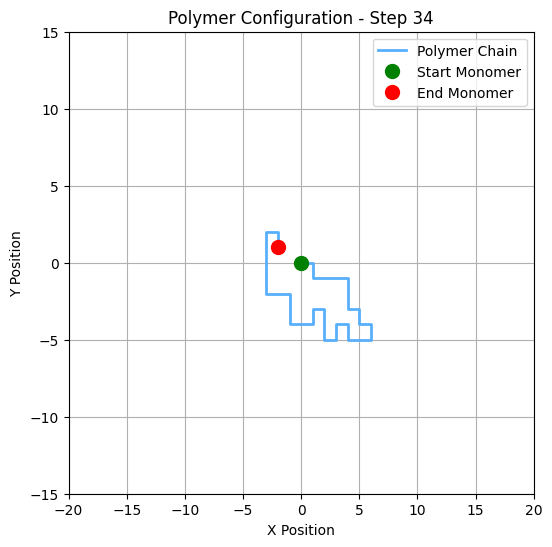

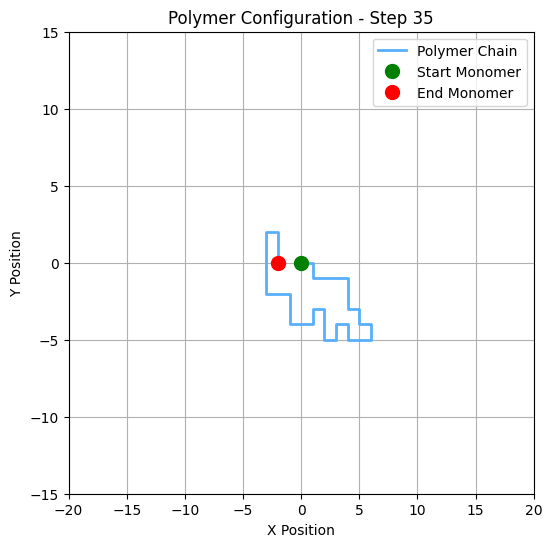

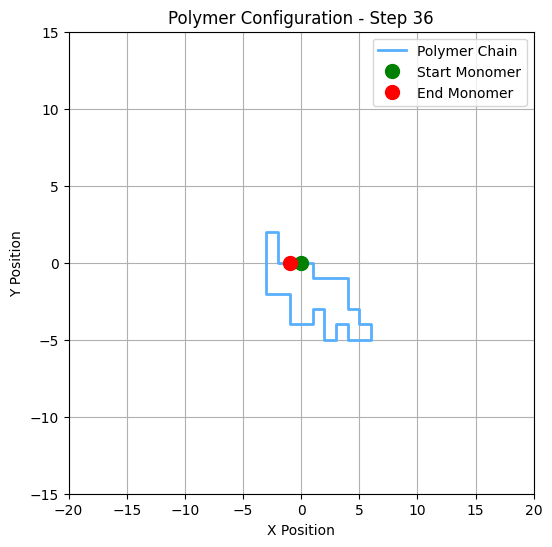

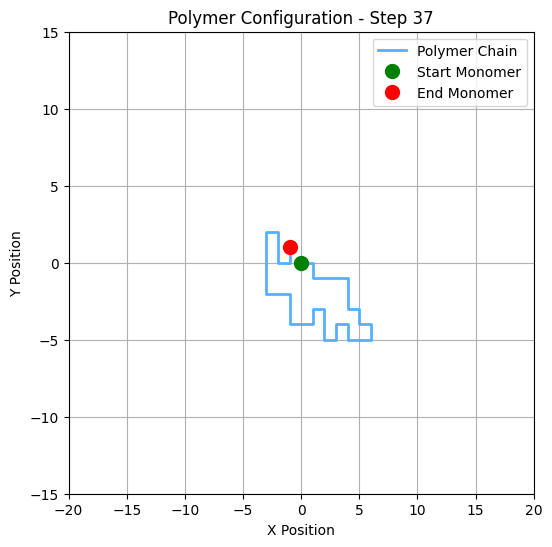

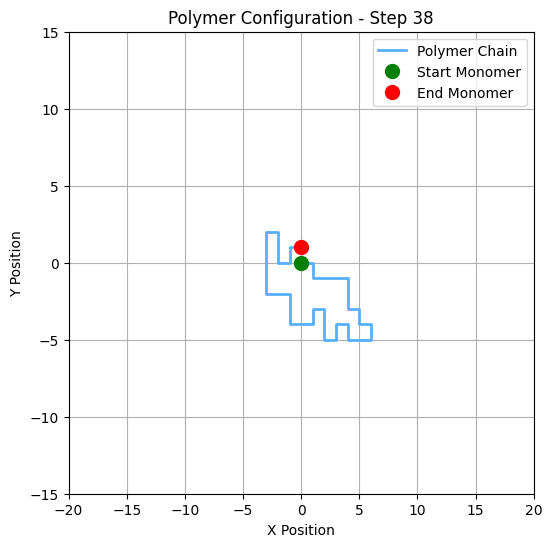

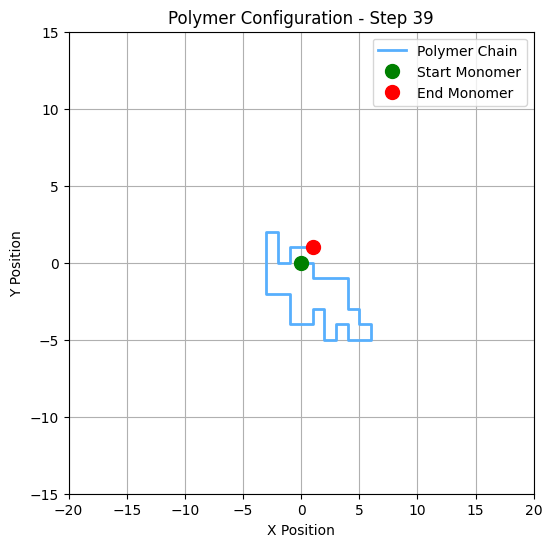

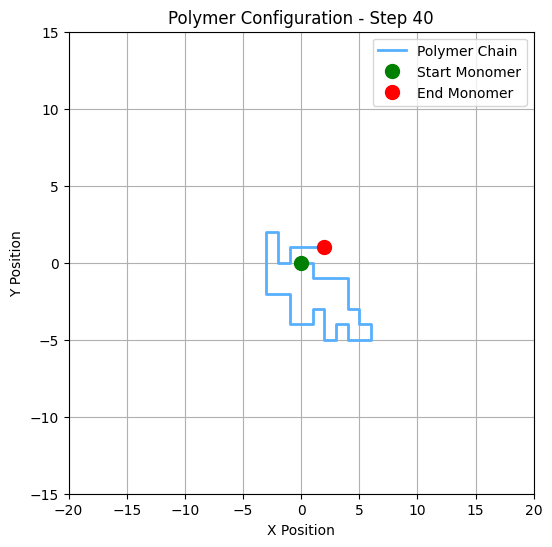

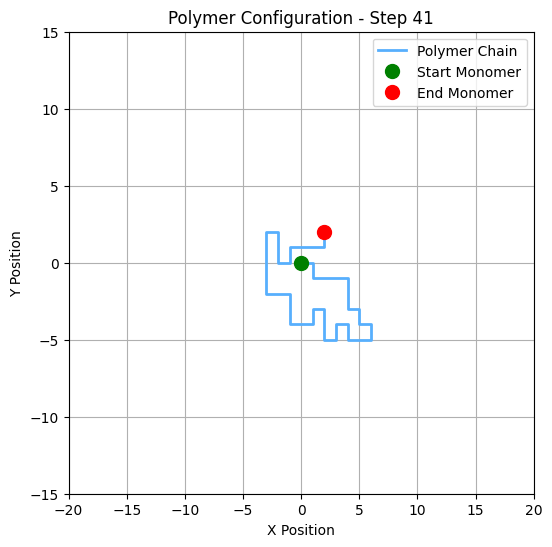

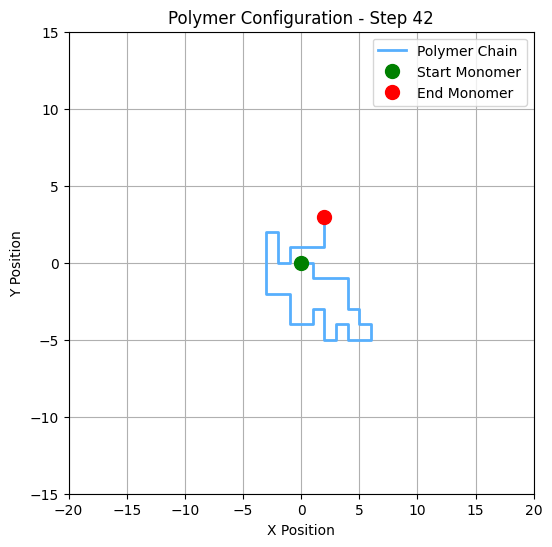

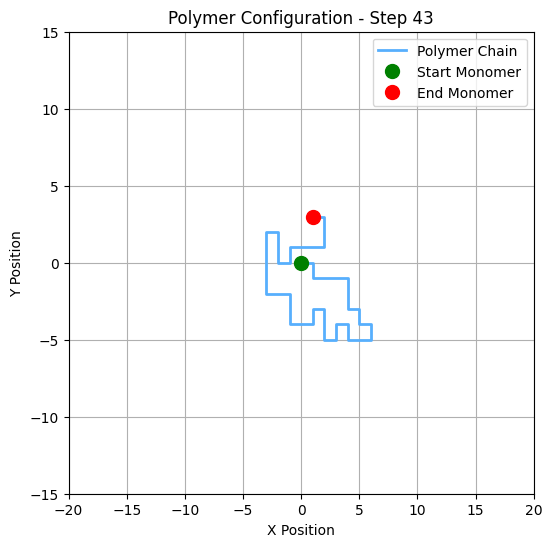

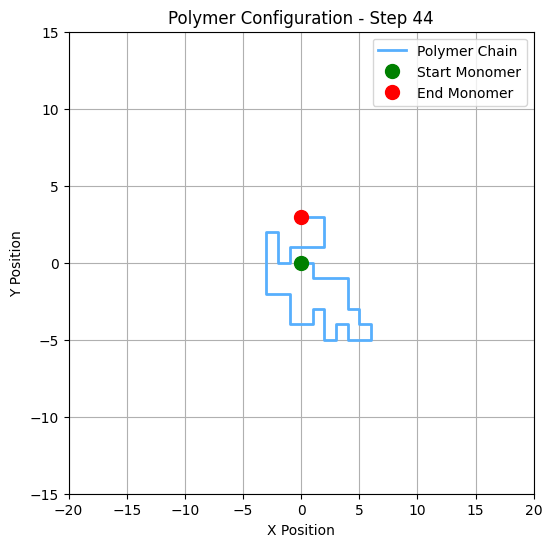

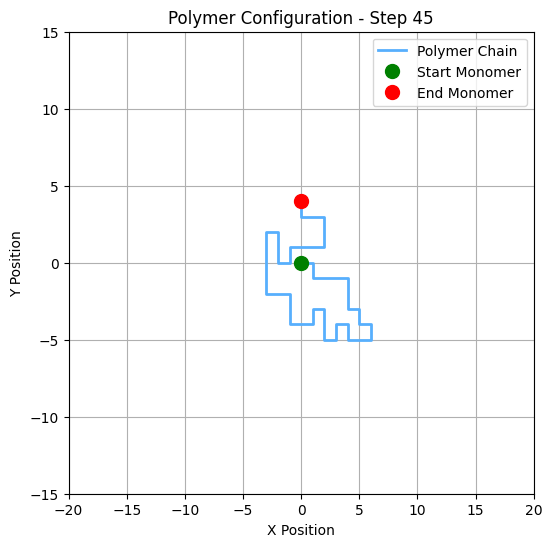

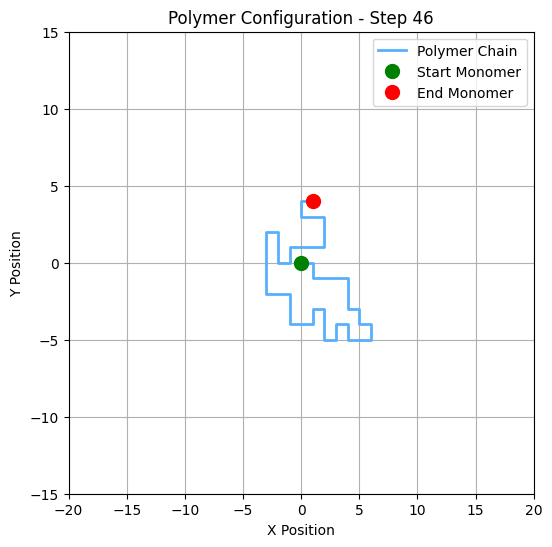

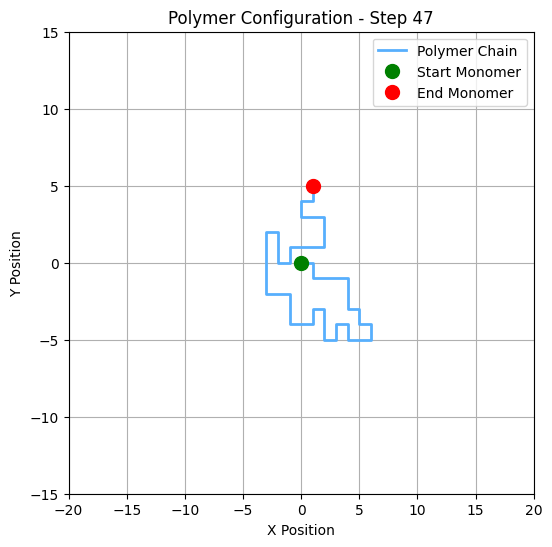

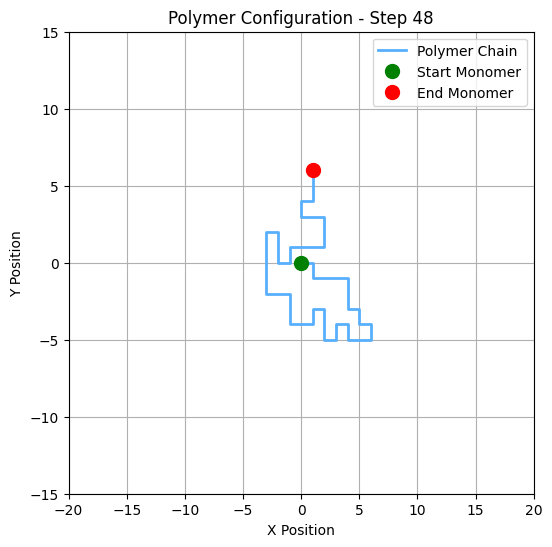

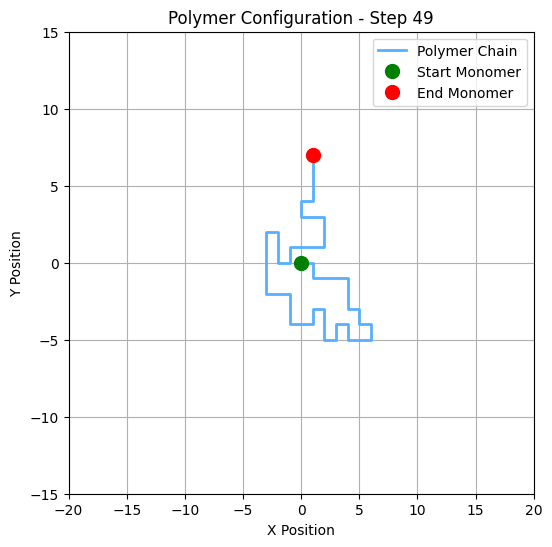

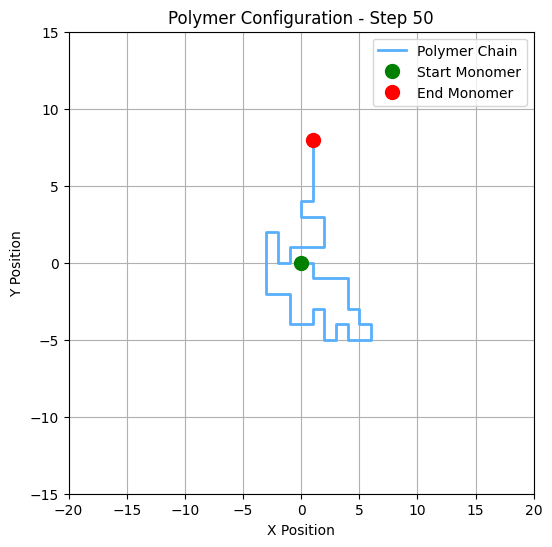

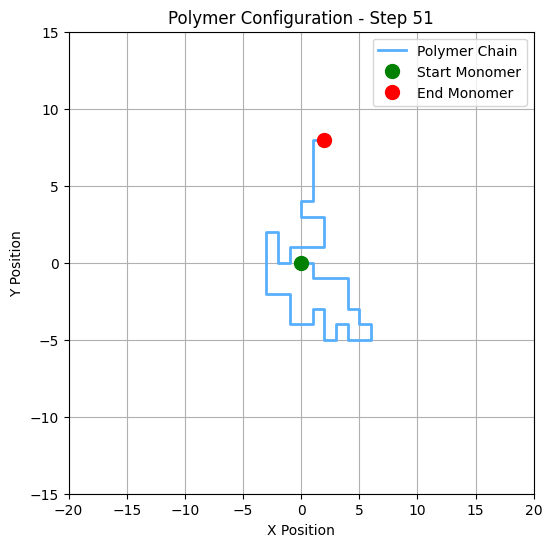

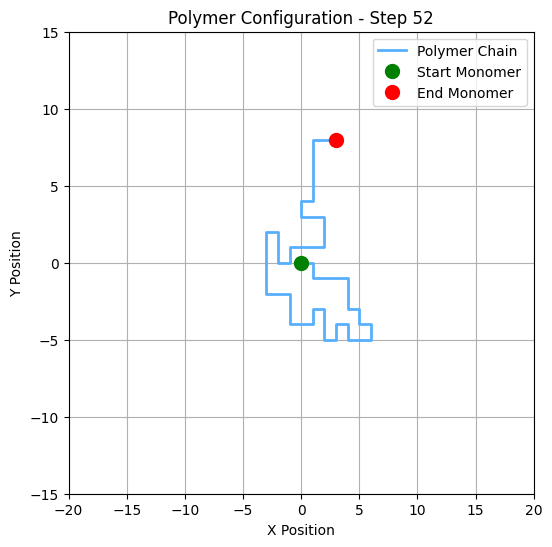

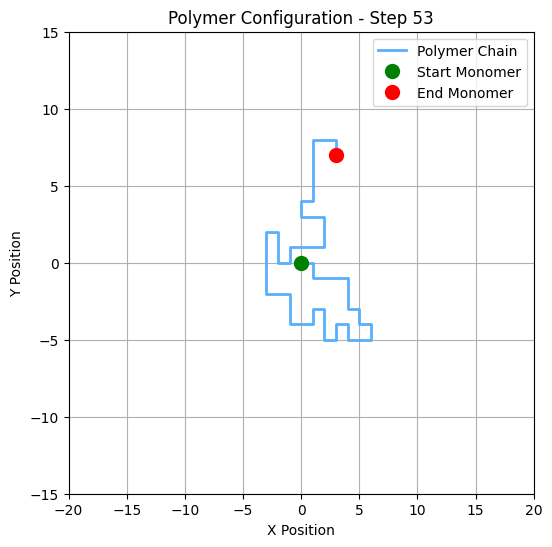

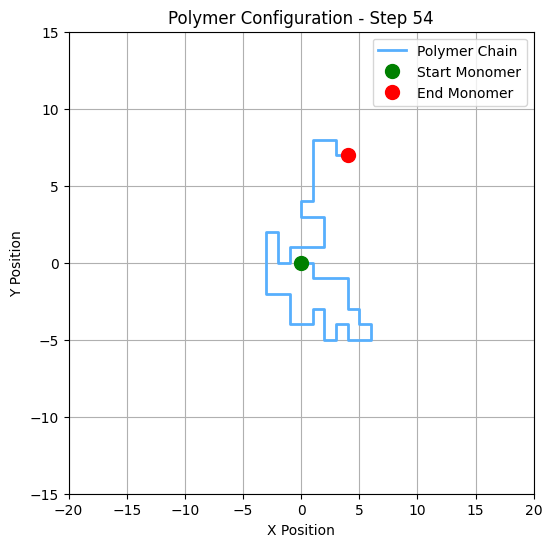

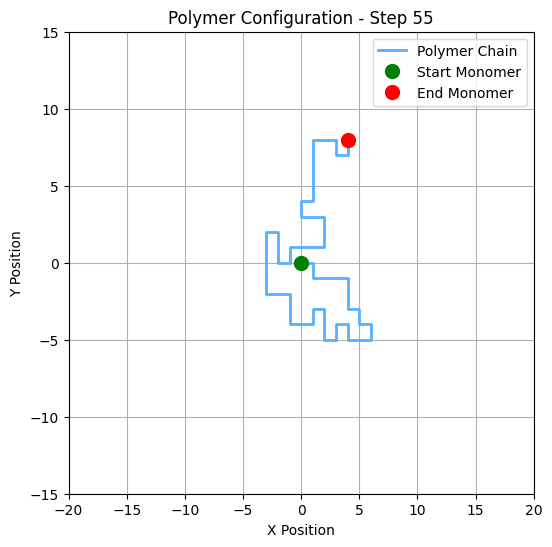

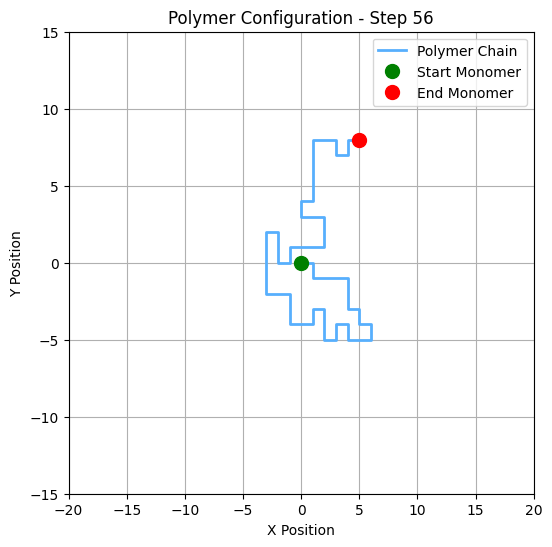

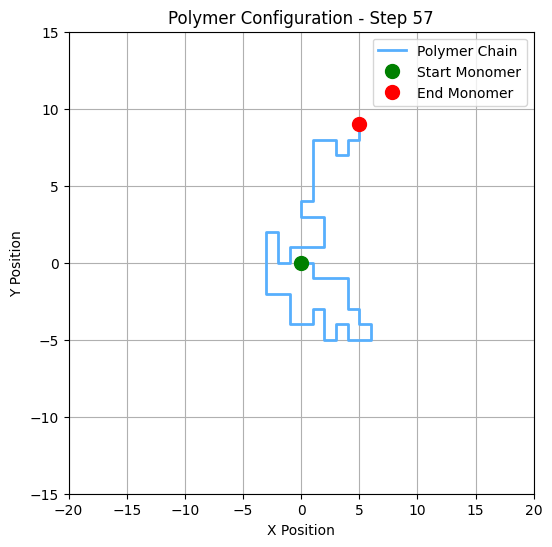

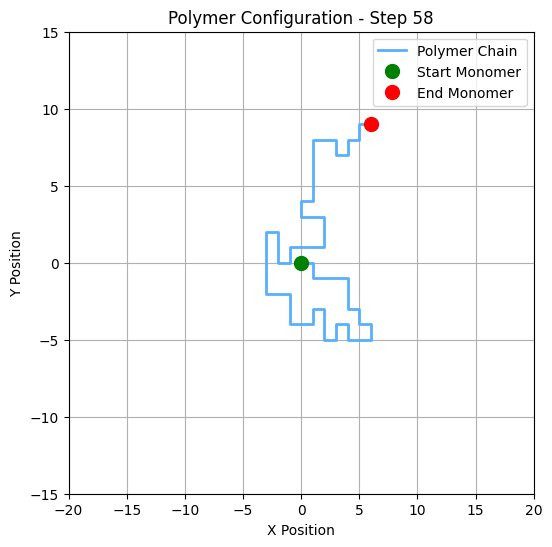

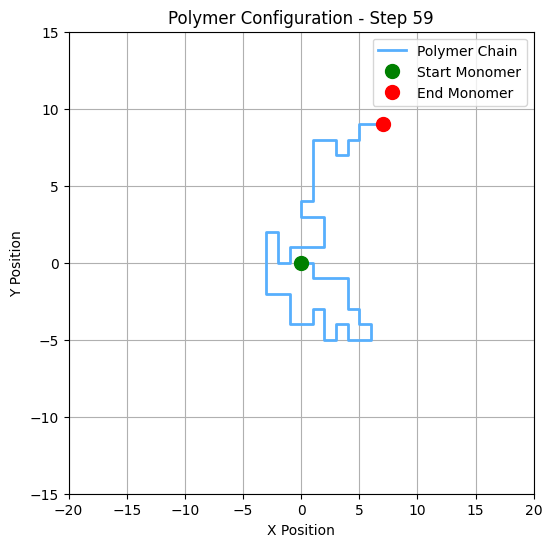

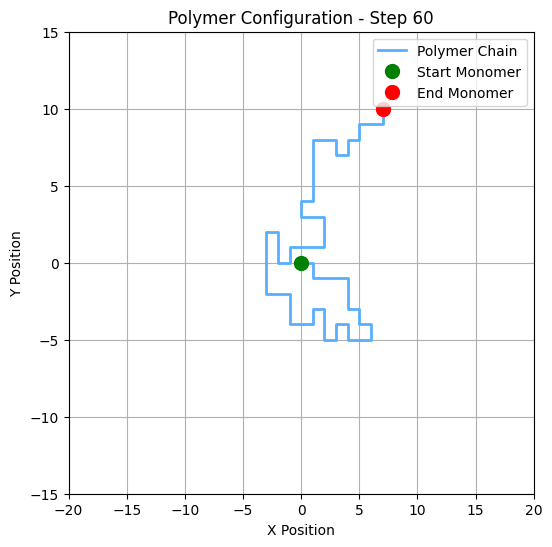

In [15]:
import matplotlib.pyplot as plt

def plot_polymer_steps(steps, L):
    """
    Plot the polymer configurations at each step stored in steps.
    
    Args:
    steps: List of polymer configurations at each step (list of lists of tuples).
    L: Size of the lattice (used to set plot limits).
    """
    for step_idx, step in enumerate(steps):
        plt.figure(figsize=(6, 6))
        plt.xlim(-L, L)
        plt.ylim(-15, 15)
        plt.grid(True)
        plt.title(f"Polymer Configuration - Step {step_idx + 1}")
        
        x, y = zip(*step)  # Extract x and y coordinates
        plt.plot(x, y, '#57AFFD', lw=2, label="Polymer Chain")  # Plot polymer
        plt.plot(x[0], y[0], 'go', markersize=10, label="Start Monomer")  # Start monomer
        plt.plot(x[-1], y[-1], 'ro', markersize=10, label="End Monomer")  # End monomer
        
        plt.legend()
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.show()

# Example usage:
# Assuming `steps` is already generated using the `bfmc_algorithm` function.
plot_polymer_steps(steps, L=20)


In [74]:
steps[0]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19)]

In [60]:
import numpy as np

# Parameters
N = 10  # Number of monomers in the polymer
L = 20   # Size of the lattice (half-width of the grid in each direction)
T = 300  # Temperature in Kelvin
k_B = 1  # Boltzmann constant
epsilon = 0.1  # Interaction energy scale

def initialize_polymer(N):
    """Generate a straight-line polymer configuration."""
    return [(0, i) for i in range(N)]

def bfmc_algorithm(N, L, T, max_attempts=100):
    """Perform Bond Fluctuation Monte Carlo simulation without plotting."""
    polymer = initialize_polymer(N)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    for attempt in range(max_attempts):
        # Step 2: Randomly choose a monomer (excluding the first and last)
        monomer_index = np.random.randint(1, N-1)
        x, y = polymer[monomer_index]

        # Step 3: Randomly choose a plaquette (direction)
        dx, dy = directions[np.random.choice(len(directions))]
        new_monomer = (x + dx, y + dy)

        # Step 4: Check bond length and excluded volume constraints
        valid_move = True
        prev_x, prev_y = polymer[monomer_index - 1]
        next_x, next_y = polymer[monomer_index + 1]

        bond_length_prev = np.sqrt((new_monomer[0] - prev_x)**2 + (new_monomer[1] - prev_y)**2)
        bond_length_next = np.sqrt((new_monomer[0] - next_x)**2 + (new_monomer[1] - next_y)**2)

        if not (0.5 <= bond_length_prev <= 1.5 and 0.5 <= bond_length_next <= 1.5):
            valid_move = False  # Violates bond length restriction
        
        if new_monomer in polymer:
            valid_move = False  # Violates excluded volume constraint

        if not valid_move:
            continue

        # Step 5: Make the move
        polymer[monomer_index] = new_monomer

    return polymer

# Example of executing the function
final_polymer = bfmc_algorithm(N, L, T)
print("Final Polymer Configuration:", final_polymer)


Final Polymer Configuration: [(0, 0), (-1, 1), (0, 2), (0, 3), (0, 4), (-1, 5), (0, 6), (-1, 7), (0, 8), (0, 9)]


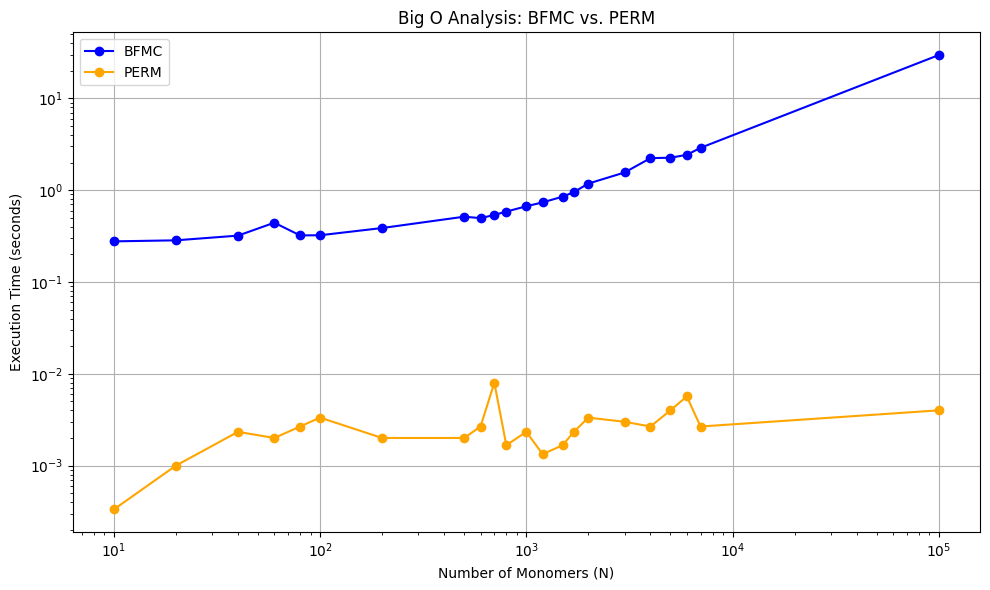

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 50   # Size of the lattice
max_attempts = 10000  # Maximum attempts for BFMC
repeats = 3  # Number of repetitions to average execution time
N_values = [10, 20, 40, 60, 80, 100, 200, 500, 600, 700, 800, 1000, 1200, 1500,1700, 2000,3000,4000,5000, 6000, 7000, 100000]  # Polymer sizes for Big O analysis

# Initialize the polymer
def initialize_polymer(N):
    return [(0, i) for i in range(N)]

# BFMC Algorithm
def bfmc_algorithm(N, L, max_attempts):
    polymer = initialize_polymer(N)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    attempts = 0
    while attempts < max_attempts:
        monomer_index = np.random.randint(1, N - 1)
        x, y = polymer[monomer_index]
        dx, dy = directions[np.random.choice(len(directions))]
        new_monomer = (x + dx, y + dy)
        valid_move = True
        if new_monomer in polymer:
            valid_move = False
        if not valid_move:
            attempts += 1
            continue
        polymer[monomer_index] = new_monomer
        attempts += 1
    return polymer

# PERM Algorithm
def perm_algorithm(N, L):
    polymer = [(0, 0)]
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    for _ in range(1, N):
        x, y = polymer[-1]
        candidates = []
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in polymer:
                candidates.append(new_pos)
        if not candidates:
            break
        probabilities = [1 / len(candidates)] * len(candidates)
        next_pos = candidates[np.random.choice(len(candidates), p=probabilities)]
        polymer.append(next_pos)
    return polymer

# Measure computational cost
def measure_cost(algorithm, *args, repeats=3):
    times = []
    for _ in range(repeats):
        start_time = time.time()
        algorithm(*args)
        times.append(time.time() - start_time)
    return np.mean(times)

# Collect data for Big O plot
bfmc_times = []
perm_times = []

for N in N_values:
    bfmc_time = measure_cost(bfmc_algorithm, N, L, max_attempts, repeats=repeats)
    perm_time = measure_cost(perm_algorithm, N, L, repeats=repeats)
    bfmc_times.append(bfmc_time)
    perm_times.append(perm_time)

# Big O Plot
plt.figure(figsize=(10, 6))
plt.plot(N_values, bfmc_times, 'o-', label='BFMC', color='blue')
plt.plot(N_values, perm_times, 'o-', label='PERM', color='orange')
plt.xlabel("Number of Monomers (N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Big O Analysis: BFMC vs. PERM")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
#...
